In [70]:
#IMPORTAR LIBRERÍAS
#Advertencias
import warnings
warnings.filterwarnings('ignore')

#Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm 

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#Preparación de datos
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn import set_config

#Modelado y pronóstico
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

#Búsqueda hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Evaluación
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [71]:
#IMPORTAR DATOS
datosBitcoin = pd.read_csv(r'C:\Users\maria\OneDrive\Universidad\Análisis de Decisiones\Taller 2\Bitcoin.csv')
datosEthereum = pd.read_csv(r'C:\Users\maria\OneDrive\Universidad\Análisis de Decisiones\Taller 2\Ethereum.csv')
datosPangolin = pd.read_csv(r'C:\Users\maria\OneDrive\Universidad\Análisis de Decisiones\Taller 2\Pangolin.csv')

In [72]:
datosBitcoin.head()

Unnamed: 0        Date      Open      High       Low     Close  \
0           0  2021-12-03  56509.17  57482.17  52496.59  53598.25   
1           1  2021-12-02  57217.37  57349.23  55895.13  56477.82   
2           2  2021-12-01  56907.97  59041.69  56553.08  57229.83   
3           3  2021-11-30  57830.11  59113.40  56057.28  57005.43   
4           4  2021-11-29  57291.90  58872.88  56792.53  57806.57   

         Volume    Market Cap  Circulating Supply  
0  3.978913e+10  1.012491e+12          18890366.0  
1  3.237997e+10  1.066829e+12          18889349.0  
2  3.685820e+10  1.080978e+12          18888361.0  
3  3.670859e+10  1.076689e+12          18887485.0  
4  3.237084e+10  1.091774e+12          18886673.0

In [73]:
datosEthereum.head()

Unnamed: 0        Date     Open     High      Low    Close        Volume  \
0           0  2021-12-03  4514.36  4647.29  4100.15  4220.71  2.587959e+10   
1           1  2021-12-02  4586.33  4628.92  4441.51  4511.30  2.150267e+10   
2           2  2021-12-01  4623.68  4780.73  4530.27  4586.99  2.763483e+10   
3           3  2021-11-30  4447.77  4753.27  4358.07  4631.48  2.862635e+10   
4           4  2021-11-29  4296.95  4460.85  4284.50  4445.11  1.908648e+10   

     Market Cap  Circulating Supply  
0  5.005523e+11         118594339.0  
1  5.349562e+11         118581386.0  
2  5.438712e+11         118568216.0  
3  5.490858e+11         118555142.0  
4  5.269313e+11         118541788.0

In [74]:
datosPangolin.head()

Unnamed: 0        Date  Open  High     Low  Close     Volume  Market Cap  \
0           0  2021-12-06  1.06  1.19  0.9411   1.19  6937456.0  78951033.0   
1           1  2021-12-05  1.18  1.19  1.0300   1.06  5190142.0  70186217.0   
2           2  2021-12-04  1.38  1.38  1.0900   1.18  5076581.0  77745945.0   
3           3  2021-12-03  1.39  1.45  1.3200   1.38  4645240.0  90742417.0   
4           4  2021-12-02  1.57  1.57  1.3900   1.39  3489754.0  91303294.0   

   Circulating Supply  
0          66345405.0  
1          66213412.0  
2          65886394.0  
3          65755374.0  
4          65685823.0

In [75]:
datosBitcoin.drop('Unnamed: 0', axis = 1, inplace = True)

In [76]:
datosEthereum.drop('Unnamed: 0', axis = 1, inplace = True)

In [77]:
datosPangolin.drop('Unnamed: 0', axis = 1, inplace = True)

In [78]:
datosBitcoin.head()

Date      Open      High       Low     Close        Volume  \
0  2021-12-03  56509.17  57482.17  52496.59  53598.25  3.978913e+10   
1  2021-12-02  57217.37  57349.23  55895.13  56477.82  3.237997e+10   
2  2021-12-01  56907.97  59041.69  56553.08  57229.83  3.685820e+10   
3  2021-11-30  57830.11  59113.40  56057.28  57005.43  3.670859e+10   
4  2021-11-29  57291.90  58872.88  56792.53  57806.57  3.237084e+10   

     Market Cap  Circulating Supply  
0  1.012491e+12          18890366.0  
1  1.066829e+12          18889349.0  
2  1.080978e+12          18888361.0  
3  1.076689e+12          18887485.0  
4  1.091774e+12          18886673.0

In [79]:
datosEthereum.head()

Date     Open     High      Low    Close        Volume    Market Cap  \
0  2021-12-03  4514.36  4647.29  4100.15  4220.71  2.587959e+10  5.005523e+11   
1  2021-12-02  4586.33  4628.92  4441.51  4511.30  2.150267e+10  5.349562e+11   
2  2021-12-01  4623.68  4780.73  4530.27  4586.99  2.763483e+10  5.438712e+11   
3  2021-11-30  4447.77  4753.27  4358.07  4631.48  2.862635e+10  5.490858e+11   
4  2021-11-29  4296.95  4460.85  4284.50  4445.11  1.908648e+10  5.269313e+11   

   Circulating Supply  
0         118594339.0  
1         118581386.0  
2         118568216.0  
3         118555142.0  
4         118541788.0

In [80]:
datosPangolin.head()

Date  Open  High     Low  Close     Volume  Market Cap  \
0  2021-12-06  1.06  1.19  0.9411   1.19  6937456.0  78951033.0   
1  2021-12-05  1.18  1.19  1.0300   1.06  5190142.0  70186217.0   
2  2021-12-04  1.38  1.38  1.0900   1.18  5076581.0  77745945.0   
3  2021-12-03  1.39  1.45  1.3200   1.38  4645240.0  90742417.0   
4  2021-12-02  1.57  1.57  1.3900   1.39  3489754.0  91303294.0   

   Circulating Supply  
0          66345405.0  
1          66213412.0  
2          65886394.0  
3          65755374.0  
4          65685823.0

In [81]:
#EXPLORACIÓN DE DATOS
datosBitcoin.info()
datosBitcoin.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                975 non-null    object 
 1   Open                975 non-null    float64
 2   High                975 non-null    float64
 3   Low                 975 non-null    float64
 4   Close               975 non-null    float64
 5   Volume              975 non-null    float64
 6   Market Cap          975 non-null    float64
 7   Circulating Supply  975 non-null    float64
dtypes: float64(7), object(1)
memory usage: 61.1+ KB


Open          High           Low         Close        Volume  \
count    975.000000    975.000000    975.000000    975.000000  9.750000e+02   
mean   22892.665251  23520.953979  22219.417067  22940.036000  3.470586e+10   
std    18947.670854  19482.991175  18335.311899  18959.846748  2.020567e+10   
min     4922.810000   5053.510000   4106.980000   4922.800000  1.039195e+10   
25%     8812.485000   9007.750000   8688.990000   8818.090000  2.102577e+10   
50%    10933.750000  11169.360000  10703.890000  10944.590000  3.106491e+10   
75%    38343.975000  39805.745000  36466.460000  38379.330000  4.314296e+10   
max    67549.740000  68789.630000  66382.060000  67566.830000  3.509679e+11   

         Market Cap  Circulating Supply  
count  9.750000e+02        9.750000e+02  
mean   4.266459e+11        1.837235e+07  
std    3.579852e+11        3.582816e+05  
min    8.677873e+10        1.762792e+07  
25%    1.608821e+11        1.808261e+07  
50%    1.996419e+11        1.845073e+07  
75%    7.186621e+11        1.867311e+07  
max    1.274831e+12        1.889037e+07

In [82]:
datosEthereum.info()
datosEthereum.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                822 non-null    object 
 1   Open                822 non-null    float64
 2   High                822 non-null    float64
 3   Low                 822 non-null    float64
 4   Close               822 non-null    float64
 5   Volume              822 non-null    float64
 6   Market Cap          822 non-null    float64
 7   Circulating Supply  822 non-null    float64
dtypes: float64(7), object(1)
memory usage: 51.5+ KB


Open         High          Low        Close        Volume  \
count   822.000000   822.000000   822.000000   822.000000  8.220000e+02   
mean   1254.104465  1300.507409  1205.000231  1258.744307  1.895532e+10   
std    1345.546861  1393.660406  1294.487429  1348.308347  1.138592e+10   
min     110.410000   116.020000    95.180000   110.610000  5.109033e+09   
25%     201.450000   206.962500   196.757500   201.905000  1.067335e+10   
50%     403.070000   416.880000   391.160000   405.110000  1.624894e+10   
75%    2163.650000  2275.135000  2085.967500  2175.422500  2.358562e+10   
max    4810.070000  4891.700000  4718.040000  4812.090000  8.448291e+10   

         Market Cap  Circulating Supply  
count  8.220000e+02        8.220000e+02  
mean   1.461454e+11        1.130732e+08  
std    1.589106e+11        3.194797e+06  
min    1.218048e+10        1.076104e+08  
25%    2.223503e+10        1.102769e+08  
50%    4.567596e+10        1.130687e+08  
75%    2.530465e+11        1.158452e+08  
max    5.690943e+11        1.185943e+08

In [83]:
datosPangolin.info()
datosPangolin.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                224 non-null    object 
 1   Open                224 non-null    float64
 2   High                224 non-null    float64
 3   Low                 224 non-null    float64
 4   Close               224 non-null    float64
 5   Volume              224 non-null    float64
 6   Market Cap          224 non-null    float64
 7   Circulating Supply  224 non-null    float64
dtypes: float64(7), object(1)
memory usage: 14.1+ KB


Open        High         Low       Close        Volume  \
count  224.000000  224.000000  224.000000  224.000000  2.240000e+02   
mean     1.758514    1.911395    1.634708    1.754352  3.475404e+06   
std      0.815295    0.940839    0.736481    0.815672  6.510401e+06   
min      0.825800    0.904400    0.820200    0.825800  0.000000e+00   
25%      1.210000    1.287500    1.160000    1.210000  5.647500e+03   
50%      1.460000    1.575000    1.390000    1.455000  1.501662e+06   
75%      1.962500    2.175000    1.840000    1.962500  3.866819e+06   
max      4.250000    4.990000    3.940000    4.270000  4.732523e+07   

         Market Cap  Circulating Supply  
count  2.240000e+02        2.240000e+02  
mean   4.751060e+07        2.722755e+07  
std    3.304984e+07        1.522523e+07  
min    0.000000e+00        0.000000e+00  
25%    2.575019e+07        2.135303e+07  
50%    3.121354e+07        2.137972e+07  
75%    6.813751e+07        2.142770e+07  
max    1.506374e+08        6.634540e+07

In [84]:
#Transformación de la variable Date a fecha
datosBitcoin['Date'] = pd.to_datetime(datosBitcoin['Date'])
datosBitcoin = datosBitcoin.set_index('Date')
datosBitcoin = datosBitcoin.asfreq('D')
datosBitcoin = datosBitcoin.sort_index()
datosBitcoin.head(20)

Open     High      Low    Close        Volume    Market Cap  \
Date                                                                         
2019-04-04  4971.31  5063.16  4836.79  4922.80  1.825181e+10  8.677873e+10   
2019-04-05  4922.81  5053.51  4919.49  5036.68  1.683733e+10  8.879612e+10   
2019-04-06  5036.79  5205.82  4992.22  5059.82  1.692980e+10  8.921273e+10   
2019-04-07  5062.79  5235.19  5050.41  5198.90  1.665542e+10  9.167423e+10   
2019-04-08  5199.84  5318.84  5148.21  5289.77  1.715411e+10  9.328637e+10   
2019-04-09  5289.92  5289.92  5167.42  5204.96  1.472210e+10  9.179933e+10   
2019-04-10  5204.11  5421.65  5193.38  5324.55  1.550459e+10  9.391844e+10   
2019-04-11  5325.08  5354.23  5017.30  5064.49  1.655562e+10  8.934117e+10   
2019-04-12  5061.20  5103.27  4955.85  5089.54  1.367521e+10  8.979263e+10   
2019-04-13  5088.85  5127.12  5061.59  5096.59  1.082329e+10  8.992557e+10   
2019-04-14  5095.76  5184.02  5053.57  5167.72  1.039195e+10  9.118860e+10   
2019-04-15  5167.32  5196.61  5024.07  5067.11  1.229016e+10  8.942224e+10   
2019-04-16  5066.58  5238.95  5055.19  5235.56  1.161866e+10  9.240461e+10   
2019-04-17  5236.14  5274.28  5219.21  5251.94  1.243848e+10  9.270262e+10   
2019-04-18  5251.48  5319.99  5250.51  5298.39  1.325649e+10  9.353240e+10   
2019-04-19  5298.15  5336.68  5233.34  5303.81  1.378024e+10  9.363835e+10   
2019-04-20  5304.16  5358.49  5295.88  5337.89  1.316965e+10  9.424872e+10   
2019-04-21  5335.88  5359.93  5257.34  5314.53  1.373184e+10  9.384705e+10   
2019-04-22  5312.49  5422.69  5280.28  5399.37  1.460163e+10  9.535421e+10   
2019-04-23  5399.37  5633.80  5389.41  5572.36  1.586731e+10  9.841739e+10   

            Circulating Supply  
Date                            
2019-04-04          17627920.0  
2019-04-05          17629890.0  
2019-04-06          17631602.0  
2019-04-07          17633389.0  
2019-04-08          17635240.0  
2019-04-09          17636894.0  
2019-04-10          17638756.0  
2019-04-11          17640703.0  
2019-04-12          17642583.0  
2019-04-13          17644263.0  
2019-04-14          17645808.0  
2019-04-15          17647581.0  
2019-04-16          17649423.0  
2019-04-17          17651118.0  
2019-04-18          17652985.0  
2019-04-19          17654920.0  
2019-04-20          17656549.0  
2019-04-21          17658579.0  
2019-04-22          17660246.0  
2019-04-23          17661706.0

In [85]:
datosBitcoin.head()

Open     High      Low    Close        Volume    Market Cap  \
Date                                                                         
2019-04-04  4971.31  5063.16  4836.79  4922.80  1.825181e+10  8.677873e+10   
2019-04-05  4922.81  5053.51  4919.49  5036.68  1.683733e+10  8.879612e+10   
2019-04-06  5036.79  5205.82  4992.22  5059.82  1.692980e+10  8.921273e+10   
2019-04-07  5062.79  5235.19  5050.41  5198.90  1.665542e+10  9.167423e+10   
2019-04-08  5199.84  5318.84  5148.21  5289.77  1.715411e+10  9.328637e+10   

            Circulating Supply  
Date                            
2019-04-04          17627920.0  
2019-04-05          17629890.0  
2019-04-06          17631602.0  
2019-04-07          17633389.0  
2019-04-08          17635240.0

In [86]:
datosBitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 975 entries, 2019-04-04 to 2021-12-03
Freq: D
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                975 non-null    float64
 1   High                975 non-null    float64
 2   Low                 975 non-null    float64
 3   Close               975 non-null    float64
 4   Volume              975 non-null    float64
 5   Market Cap          975 non-null    float64
 6   Circulating Supply  975 non-null    float64
dtypes: float64(7)
memory usage: 60.9 KB


In [87]:
datosEthereum['Date'] = pd.to_datetime(datosEthereum['Date'])
datosEthereum = datosEthereum.set_index('Date')
datosEthereum = datosEthereum.asfreq('D')
datosEthereum = datosEthereum.sort_index()
datosEthereum.head(20)

Open    High     Low   Close        Volume    Market Cap  \
Date                                                                     
2019-09-04  179.49  180.14  175.33  175.99  5.938120e+09  1.893836e+10   
2019-09-05  175.97  176.16  171.75  174.22  5.589477e+09  1.874965e+10   
2019-09-06  174.17  177.72  168.34  169.96  6.797612e+09  1.829338e+10   
2019-09-07  169.96  180.85  169.44  178.26  6.791531e+09  1.918987e+10   
2019-09-08  178.28  182.98  178.14  181.36  6.472677e+09  1.952528e+10   
2019-09-09  181.36  184.15  177.42  181.15  7.232939e+09  1.950553e+10   
2019-09-10  181.21  184.06  178.12  179.79  6.291477e+09  1.936128e+10   
2019-09-11  179.84  181.76  176.50  178.73  7.157139e+09  1.924937e+10   
2019-09-12  178.80  182.00  177.85  181.02  5.838605e+09  1.949854e+10   
2019-09-13  180.98  181.50  178.58  181.11  5.955041e+09  1.951105e+10   
2019-09-14  181.32  188.45  180.37  188.11  6.500687e+09  2.026727e+10   
2019-09-15  188.07  190.40  186.45  189.79  6.222875e+09  2.045124e+10   
2019-09-16  189.69  198.20  189.69  197.11  8.242029e+09  2.124317e+10   
2019-09-17  197.11  213.73  196.72  208.61  1.023259e+10  2.248489e+10   
2019-09-18  208.05  216.71  208.05  211.39  9.194635e+09  2.278789e+10   
2019-09-19  211.25  222.87  204.69  221.28  1.062007e+10  2.385675e+10   
2019-09-20  221.07  221.60  215.16  218.05  8.027974e+09  2.351141e+10   
2019-09-21  217.90  220.96  215.00  215.52  7.743310e+09  2.324112e+10   
2019-09-22  215.49  216.09  207.64  211.55  7.812855e+09  2.281576e+10   
2019-09-23  211.71  211.84  201.89  201.92  7.494673e+09  2.178053e+10   

            Circulating Supply  
Date                            
2019-09-04         107610436.0  
2019-09-05         107620511.0  
2019-09-06         107633424.0  
2019-09-07         107651036.0  
2019-09-08         107660326.0  
2019-09-09         107676147.0  
2019-09-10         107688284.0  
2019-09-11         107700821.0  
2019-09-12         107714853.0  
2019-09-13         107730389.0  
2019-09-14         107741601.0  
2019-09-15         107757201.0  
2019-09-16         107773161.0  
2019-09-17         107784331.0  
2019-09-18         107800235.0  
2019-09-19         107812507.0  
2019-09-20         107825776.0  
2019-09-21         107837422.0  
2019-09-22         107850416.0  
2019-09-23         107867149.0

In [88]:
datosEthereum.head()

Open    High     Low   Close        Volume    Market Cap  \
Date                                                                     
2019-09-04  179.49  180.14  175.33  175.99  5.938120e+09  1.893836e+10   
2019-09-05  175.97  176.16  171.75  174.22  5.589477e+09  1.874965e+10   
2019-09-06  174.17  177.72  168.34  169.96  6.797612e+09  1.829338e+10   
2019-09-07  169.96  180.85  169.44  178.26  6.791531e+09  1.918987e+10   
2019-09-08  178.28  182.98  178.14  181.36  6.472677e+09  1.952528e+10   

            Circulating Supply  
Date                            
2019-09-04         107610436.0  
2019-09-05         107620511.0  
2019-09-06         107633424.0  
2019-09-07         107651036.0  
2019-09-08         107660326.0

In [89]:
datosEthereum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 822 entries, 2019-09-04 to 2021-12-03
Freq: D
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                822 non-null    float64
 1   High                822 non-null    float64
 2   Low                 822 non-null    float64
 3   Close               822 non-null    float64
 4   Volume              822 non-null    float64
 5   Market Cap          822 non-null    float64
 6   Circulating Supply  822 non-null    float64
dtypes: float64(7)
memory usage: 51.4 KB


In [90]:
datosPangolin['Date'] = pd.to_datetime(datosPangolin['Date'])
datosPangolin = datosPangolin.set_index('Date')
datosPangolin = datosPangolin.asfreq('D')
datosPangolin = datosPangolin.sort_index()
datosPangolin.head(20)

Open  High   Low  Close  Volume  Market Cap  Circulating Supply
Date                                                                       
2021-04-27  2.26  2.34  2.24   2.32     0.0         0.0                 0.0
2021-04-28  2.32  2.54  2.28   2.44     0.0         0.0                 0.0
2021-04-29  2.44  2.60  2.38   2.52     0.0         0.0                 0.0
2021-04-30  2.52  3.97  2.50   3.97     0.0         0.0                 0.0
2021-05-01  3.97  4.75  3.94   3.98     0.0  85062701.0          21372537.0
2021-05-02  3.98  3.98  3.77   3.79     0.0  81073012.0          21391296.0
2021-05-03  3.79  4.31  3.79   4.24     0.0  90620631.0          21372790.0
2021-05-04  4.25  4.25  3.53   3.57     0.0  76265473.0          21362877.0
2021-05-05  3.57  3.88  3.44   3.87     0.0  82716110.0          21373671.0
2021-05-06  3.87  4.18  3.86   4.01     0.0  85677663.0          21366000.0
2021-05-07  4.01  4.45  3.87   3.97     0.0  84976058.0          21404548.0
2021-05-08  3.97  4.19  3.93   4.13     0.0  88189958.0          21353500.0
2021-05-09  4.13  4.14  3.78   4.14     0.0  88524122.0          21382638.0
2021-05-10  4.14  4.31  3.54   3.79     0.0  81036318.0          21381614.0
2021-05-11  3.79  3.91  3.64   3.91     0.0  83634389.0          21389869.0
2021-05-12  3.91  4.23  3.39   3.39     0.0  72550798.0          21401415.0
2021-05-13  3.37  3.73  3.25   3.50     0.0  74754875.0          21358535.0
2021-05-14  3.49  3.78  3.38   3.68     0.0  78701207.0          21386197.0
2021-05-15  3.68  3.79  3.46   3.46     0.0  73888740.0          21355127.0
2021-05-16  3.45  3.73  3.22   3.46     0.0  73961651.0          21376199.0

In [91]:
datosPangolin.head()

Open  High   Low  Close  Volume  Market Cap  Circulating Supply
Date                                                                       
2021-04-27  2.26  2.34  2.24   2.32     0.0         0.0                 0.0
2021-04-28  2.32  2.54  2.28   2.44     0.0         0.0                 0.0
2021-04-29  2.44  2.60  2.38   2.52     0.0         0.0                 0.0
2021-04-30  2.52  3.97  2.50   3.97     0.0         0.0                 0.0
2021-05-01  3.97  4.75  3.94   3.98     0.0  85062701.0          21372537.0

In [92]:
datosPangolin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 224 entries, 2021-04-27 to 2021-12-06
Freq: D
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                224 non-null    float64
 1   High                224 non-null    float64
 2   Low                 224 non-null    float64
 3   Close               224 non-null    float64
 4   Volume              224 non-null    float64
 5   Market Cap          224 non-null    float64
 6   Circulating Supply  224 non-null    float64
dtypes: float64(7)
memory usage: 14.0 KB


In [93]:
#Validar que el índice temporal está completo
(datosBitcoin.index == pd.date_range(start = datosBitcoin.index.min(),
                            end = datosBitcoin.index.max(),
                            freq = datosBitcoin.index.freq)).all()

True

In [94]:
(datosEthereum.index == pd.date_range(start = datosEthereum.index.min(),
                            end = datosEthereum.index.max(),
                            freq = datosEthereum.index.freq)).all()

True

In [95]:
(datosPangolin.index == pd.date_range(start = datosPangolin.index.min(),
                            end = datosPangolin.index.max(),
                            freq = datosPangolin.index.freq)).all()

True

In [96]:
numColsBit = datosBitcoin.select_dtypes(include = ['float64', 'int64']).columns.to_list()

In [97]:
numColsEth = datosEthereum.select_dtypes(include = ['float64', 'int64']).columns.to_list()

In [98]:
numColsPan = datosPangolin.select_dtypes(include = ['float64', 'int64']).columns.to_list()

In [99]:
numTransformerBit = Pipeline(steps = [('scaler', StandardScaler())])
numTransformerEth = Pipeline(steps = [('scaler', StandardScaler())])
numTransformerPan = Pipeline(steps = [('scaler', StandardScaler())])

In [100]:
preprocesadorBit = ColumnTransformer(transformers = [
    ('numBit', numTransformerBit, numColsBit)
], remainder = 'passthrough')

set_config(display = 'diagram')
preprocesadorBit

ColumnTransformer(remainder='passthrough',
                  transformers=[('numBit',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Open', 'High', 'Low', 'Close', 'Volume',
                                  'Market Cap', 'Circulating Supply'])])

In [101]:
preprocesadorEth = ColumnTransformer(transformers = [
    ('numEth', numTransformerEth, numColsEth)
], remainder = 'passthrough')

set_config(display = 'diagram')
preprocesadorEth

ColumnTransformer(remainder='passthrough',
                  transformers=[('numEth',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Open', 'High', 'Low', 'Close', 'Volume',
                                  'Market Cap', 'Circulating Supply'])])

In [102]:
preprocesadorPan = ColumnTransformer(transformers = [
    ('numPan', numTransformerPan, numColsPan)
], remainder = 'passthrough')

set_config(display = 'diagram')
preprocesadorPan

ColumnTransformer(remainder='passthrough',
                  transformers=[('numPan',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Open', 'High', 'Low', 'Close', 'Volume',
                                  'Market Cap', 'Circulating Supply'])])

In [103]:
datosPreBit = preprocesadorBit.fit_transform(datosBitcoin)
datosPreBit

array([[-0.94631962, -0.9478661 , -0.94852753, ..., -0.81474604,
        -0.94987591, -2.07883415],
       [-0.94888062, -0.94836165, -0.94401479, ..., -0.88478631,
        -0.94423762, -2.07333286],
       [-0.94286202, -0.94054005, -0.94004609, ..., -0.88020753,
        -0.94307324, -2.06855204],
       ...,
       [ 1.79614488,  1.82410214,  1.87350418, ...,  0.10657615,
         1.82875614,  1.44098938],
       [ 1.81248244,  1.73718896,  1.83760146, ..., -0.11516975,
         1.78921333,  1.4437484 ],
       [ 1.77508663,  1.74401585,  1.65215142, ...,  0.25170585,
         1.6373452 ,  1.44658841]])

In [104]:
datosPreEth = preprocesadorEth.fit_transform(datosEthereum)
datosPreEth

array([[-0.79913138, -0.80439217, -0.79591126, ..., -1.14396701,
        -0.80098208, -1.7109342 ],
       [-0.80174901, -0.8072497 , -0.79867852, ..., -1.17460626,
        -0.80217036, -1.70777872],
       [-0.80308757, -0.80612966, -0.80131437, ..., -1.06843386,
        -0.80504334, -1.70373437],
       ...,
       [ 2.50576708,  2.49870157,  2.57035659, ...,  0.76276575,
         2.50435134,  1.72103725],
       [ 2.47799195,  2.38970628,  2.50174716, ...,  0.2238645 ,
         2.44821636,  1.72516209],
       [ 2.42447184,  2.40289542,  2.23788378, ...,  0.60851356,
         2.23158609,  1.72921897]])

In [105]:
datosPrePan = preprocesadorPan.fit_transform(datosPangolin)
datosPrePan

array([[ 0.61647489,  0.45657688,  0.82371168, ..., -0.53501897,
        -1.4407638 , -1.79232309],
       [ 0.69023272,  0.66962923,  0.87814568, ..., -0.53501897,
        -1.4407638 , -1.79232309],
       [ 0.83774836,  0.73354493,  1.0142307 , ..., -0.53501897,
        -1.4407638 , -1.79232309],
       ...,
       [-0.46530648, -0.56607437, -0.74126603, ...,  0.24649214,
         0.91688978,  2.54481748],
       [-0.71116589, -0.7684741 , -0.82291704, ...,  0.26397421,
         0.68764027,  2.56634428],
       [-0.85868153, -0.7684741 , -0.94389662, ...,  0.53296338,
         0.9534342 ,  2.57503305]])

In [106]:
labelsBit = np.concatenate([numColsBit])

In [107]:
datosBitcoinPro = pd.DataFrame(datosPreBit, columns = labelsBit)
datosBitcoinPro.head()

Open      High       Low     Close    Volume  Market Cap  \
0 -0.946320 -0.947866 -0.948528 -0.950772 -0.814746   -0.949876   
1 -0.948881 -0.948362 -0.944015 -0.944762 -0.884786   -0.944238   
2 -0.942862 -0.940540 -0.940046 -0.943541 -0.880208   -0.943073   
3 -0.941489 -0.939032 -0.936871 -0.936202 -0.893794   -0.936194   
4 -0.934252 -0.934736 -0.931534 -0.931406 -0.869100   -0.931688   

   Circulating Supply  
0           -2.078834  
1           -2.073333  
2           -2.068552  
3           -2.063562  
4           -2.058393

In [108]:
labelsEth = np.concatenate([numColsEth])

In [109]:
datosEthereumPro = pd.DataFrame(datosPreEth, columns = labelsEth)
datosEthereumPro.head()

Open      High       Low     Close    Volume  Market Cap  \
0 -0.799131 -0.804392 -0.795911 -0.803535 -1.143967   -0.800982   
1 -0.801749 -0.807250 -0.798679 -0.804849 -1.174606   -0.802170   
2 -0.803088 -0.806130 -0.801314 -0.808010 -1.068434   -0.805043   
3 -0.806218 -0.803882 -0.800464 -0.801851 -1.068968   -0.799398   
4 -0.800031 -0.802353 -0.793739 -0.799550 -1.096990   -0.797286   

   Circulating Supply  
0           -1.710934  
1           -1.707779  
2           -1.703734  
3           -1.698218  
4           -1.695309

In [110]:
labelsPan = np.concatenate([numColsPan])

In [111]:
datosPangolinPro = pd.DataFrame(datosPrePan, columns = labelsPan)
datosPangolinPro.head()

Open      High       Low     Close    Volume  Market Cap  \
0  0.616475  0.456577  0.823712  0.695027 -0.535019   -1.440764   
1  0.690233  0.669629  0.878146  0.842475 -0.535019   -1.440764   
2  0.837748  0.733545  1.014231  0.940773 -0.535019   -1.440764   
3  0.936092  2.192953  1.177533  2.722429 -0.535019   -1.440764   
4  2.718573  3.023858  3.137157  2.734716 -0.535019    1.138771   

   Circulating Supply  
0           -1.792323  
1           -1.792323  
2           -1.792323  
3           -1.792323  
4           -0.385421

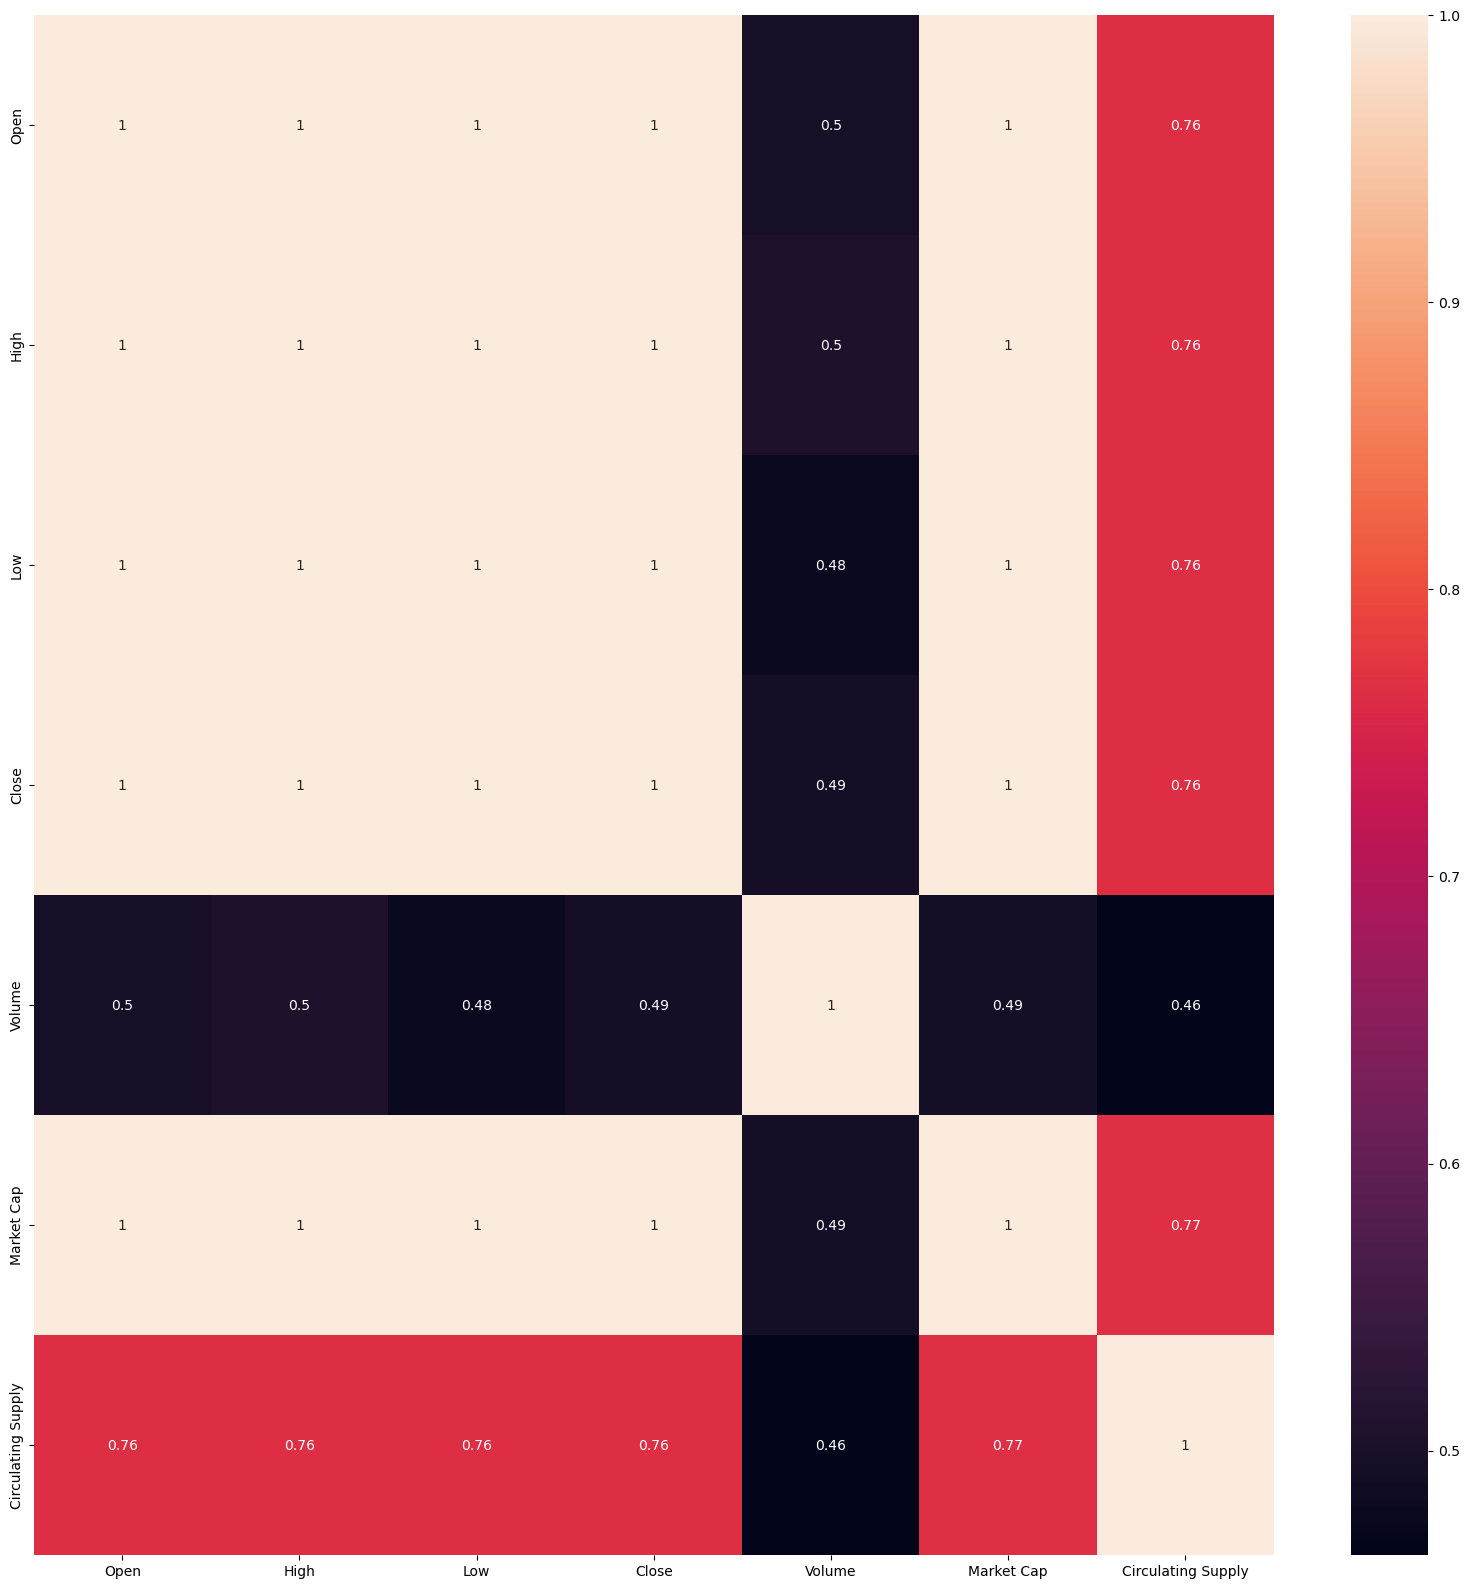

In [112]:
#Mapas de correlación
plt.figure(figsize = (20, 20))
sb.heatmap(datosBitcoinPro.corr(), annot = True)
plt.show()

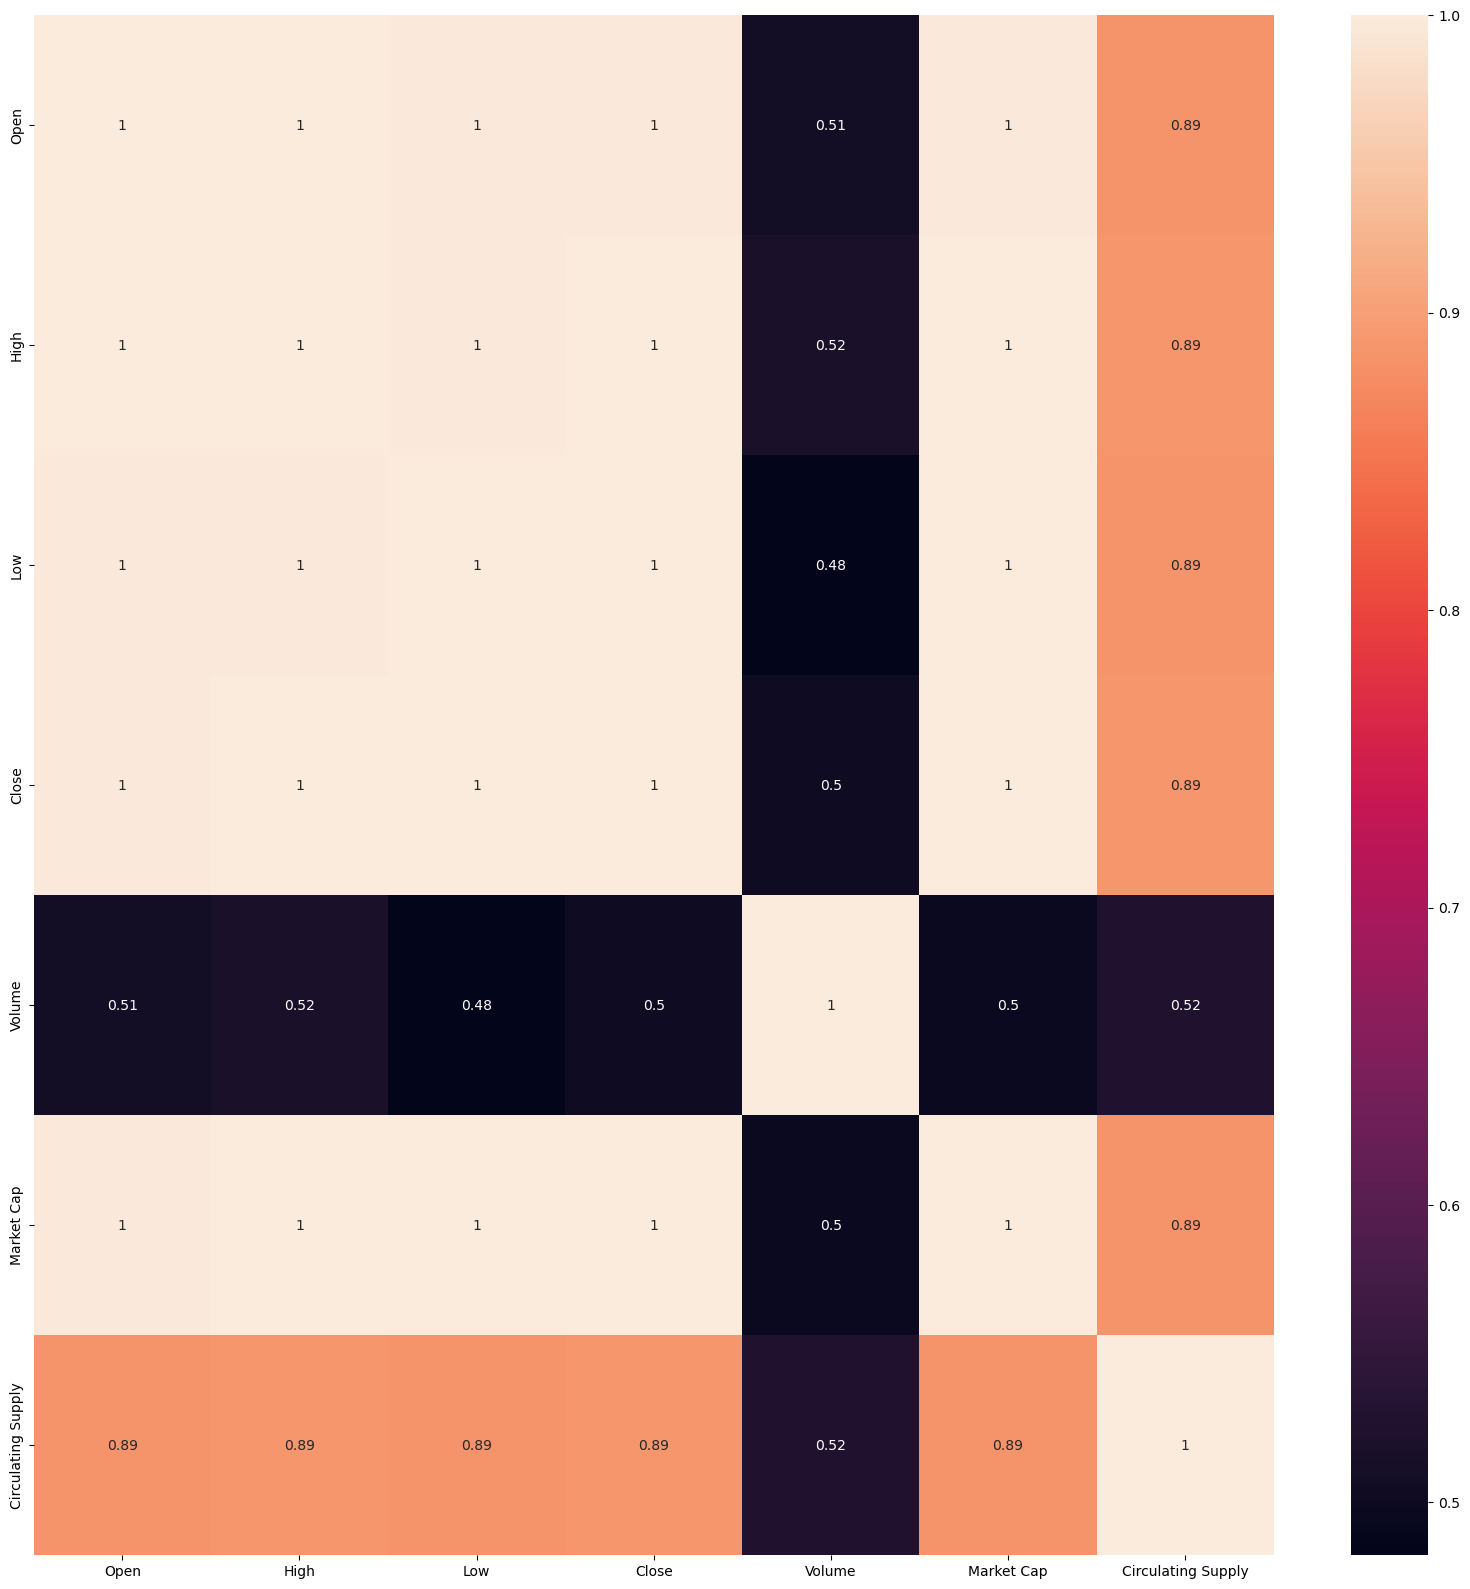

In [113]:
plt.figure(figsize = (20, 20))
sb.heatmap(datosEthereumPro.corr(), annot = True)
plt.show()

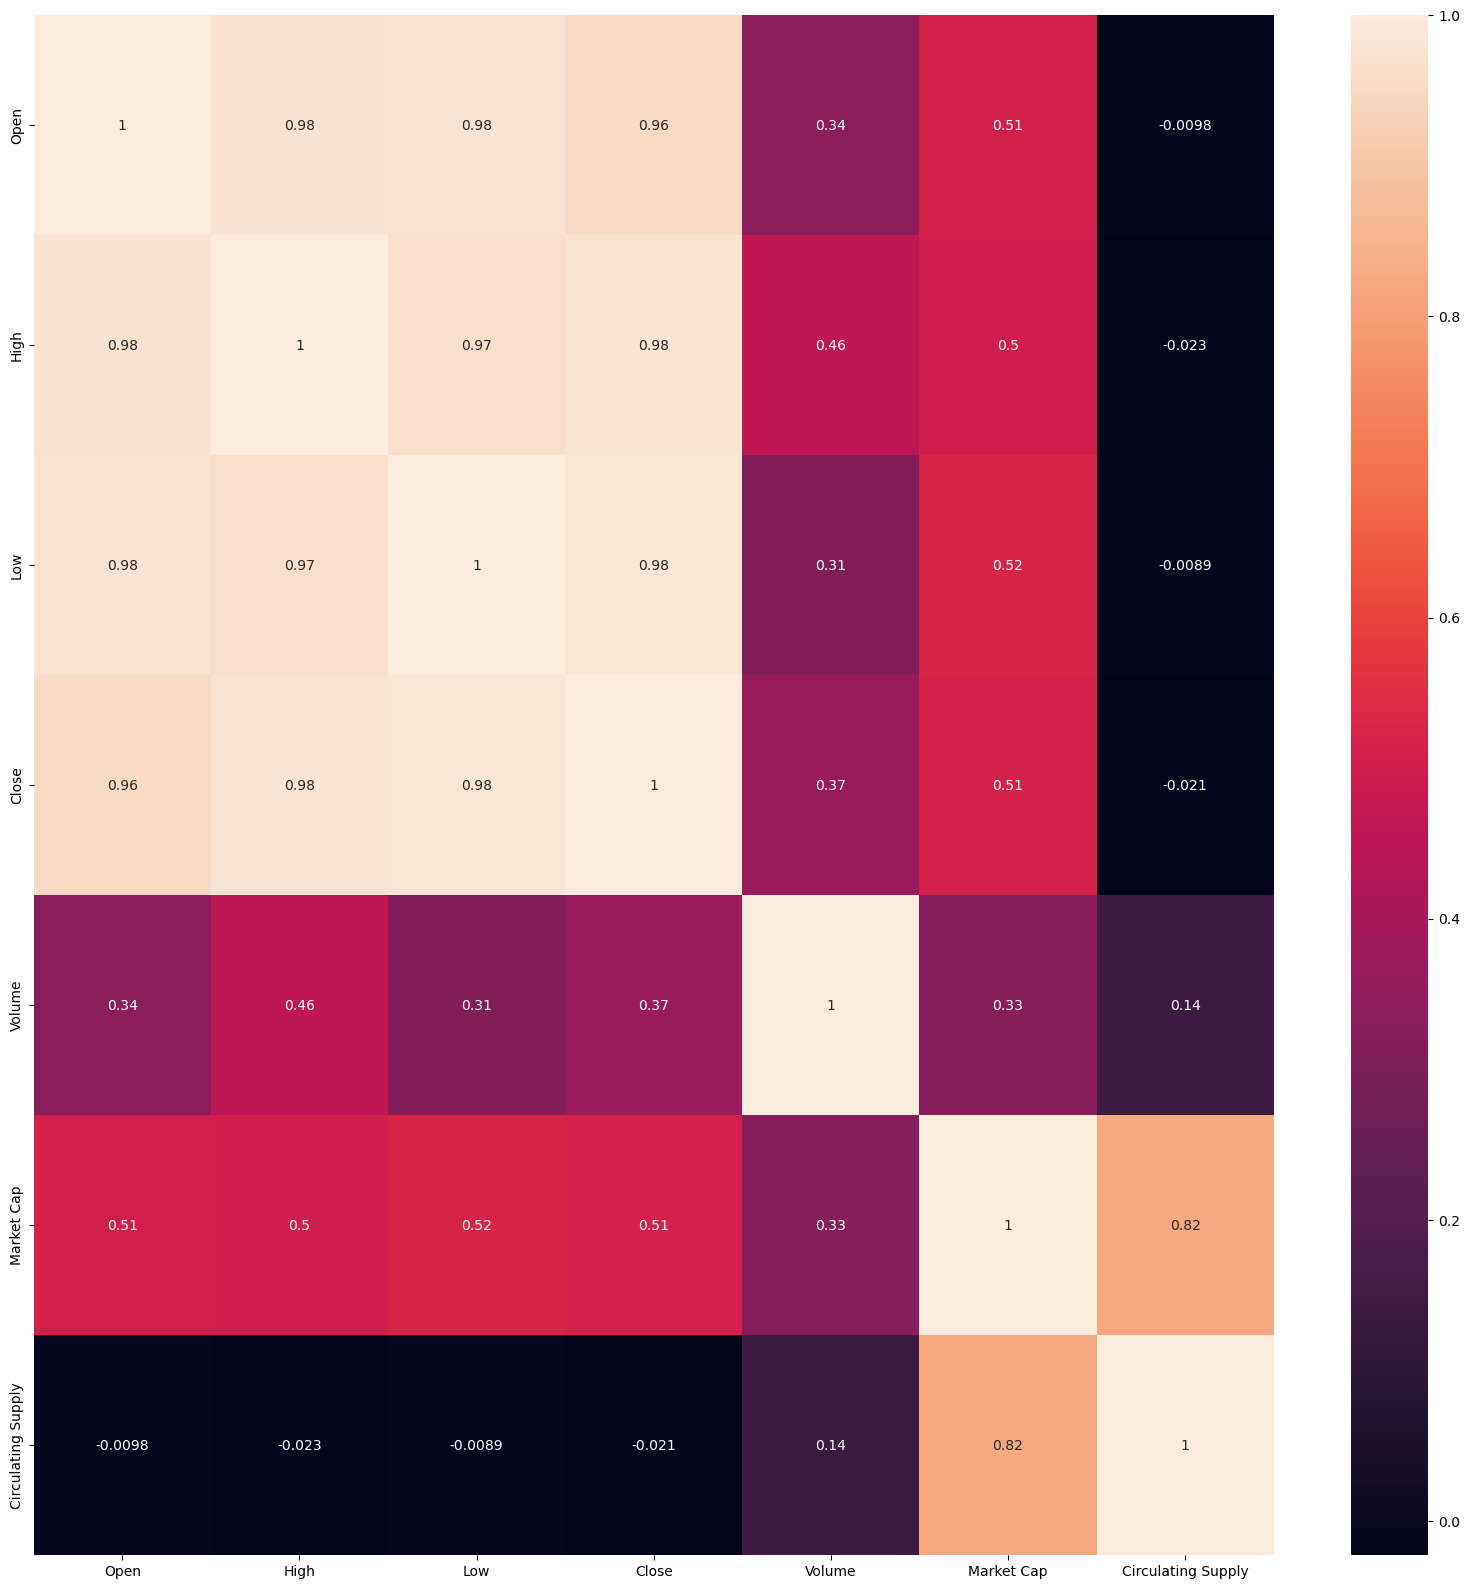

In [114]:
plt.figure(figsize = (20, 20))
sb.heatmap(datosPangolinPro.corr(), annot = True)
plt.show()

In [115]:
#Separacipon de X con Y 
xBit = datosBitcoinPro.drop('Market Cap', axis = 1)
yBit = datosBitcoinPro['Market Cap']

In [116]:
xEntBit, xPruebaBit, yEntBit, yPruebaBit = train_test_split(xBit, yBit, train_size = 0.7, random_state = 123 )

In [117]:
xEth = datosEthereumPro.drop('Market Cap', axis = 1)
yEth = datosEthereumPro['Market Cap']

In [118]:
xEntEth, xPruebaEth, yEntEth, yPruebaEth = train_test_split(xEth, yEth, train_size = 0.7, random_state = 123)

In [119]:
xPan = datosPangolinPro.drop('Market Cap', axis = 1)
yPan = datosPangolinPro['Market Cap']

In [120]:
xEntPan, xPruebaPan, yEntPan, yPruebaPan = train_test_split(xPan, yPan, train_size = 0.7, random_state = 123)

In [121]:
#Modelos de árbol de decisión
modeloBit = DecisionTreeRegressor()
modeloBit.fit(xEntBit, yEntBit)

DecisionTreeRegressor()

Profundidad del árbol: 17
Número de hojas: 682


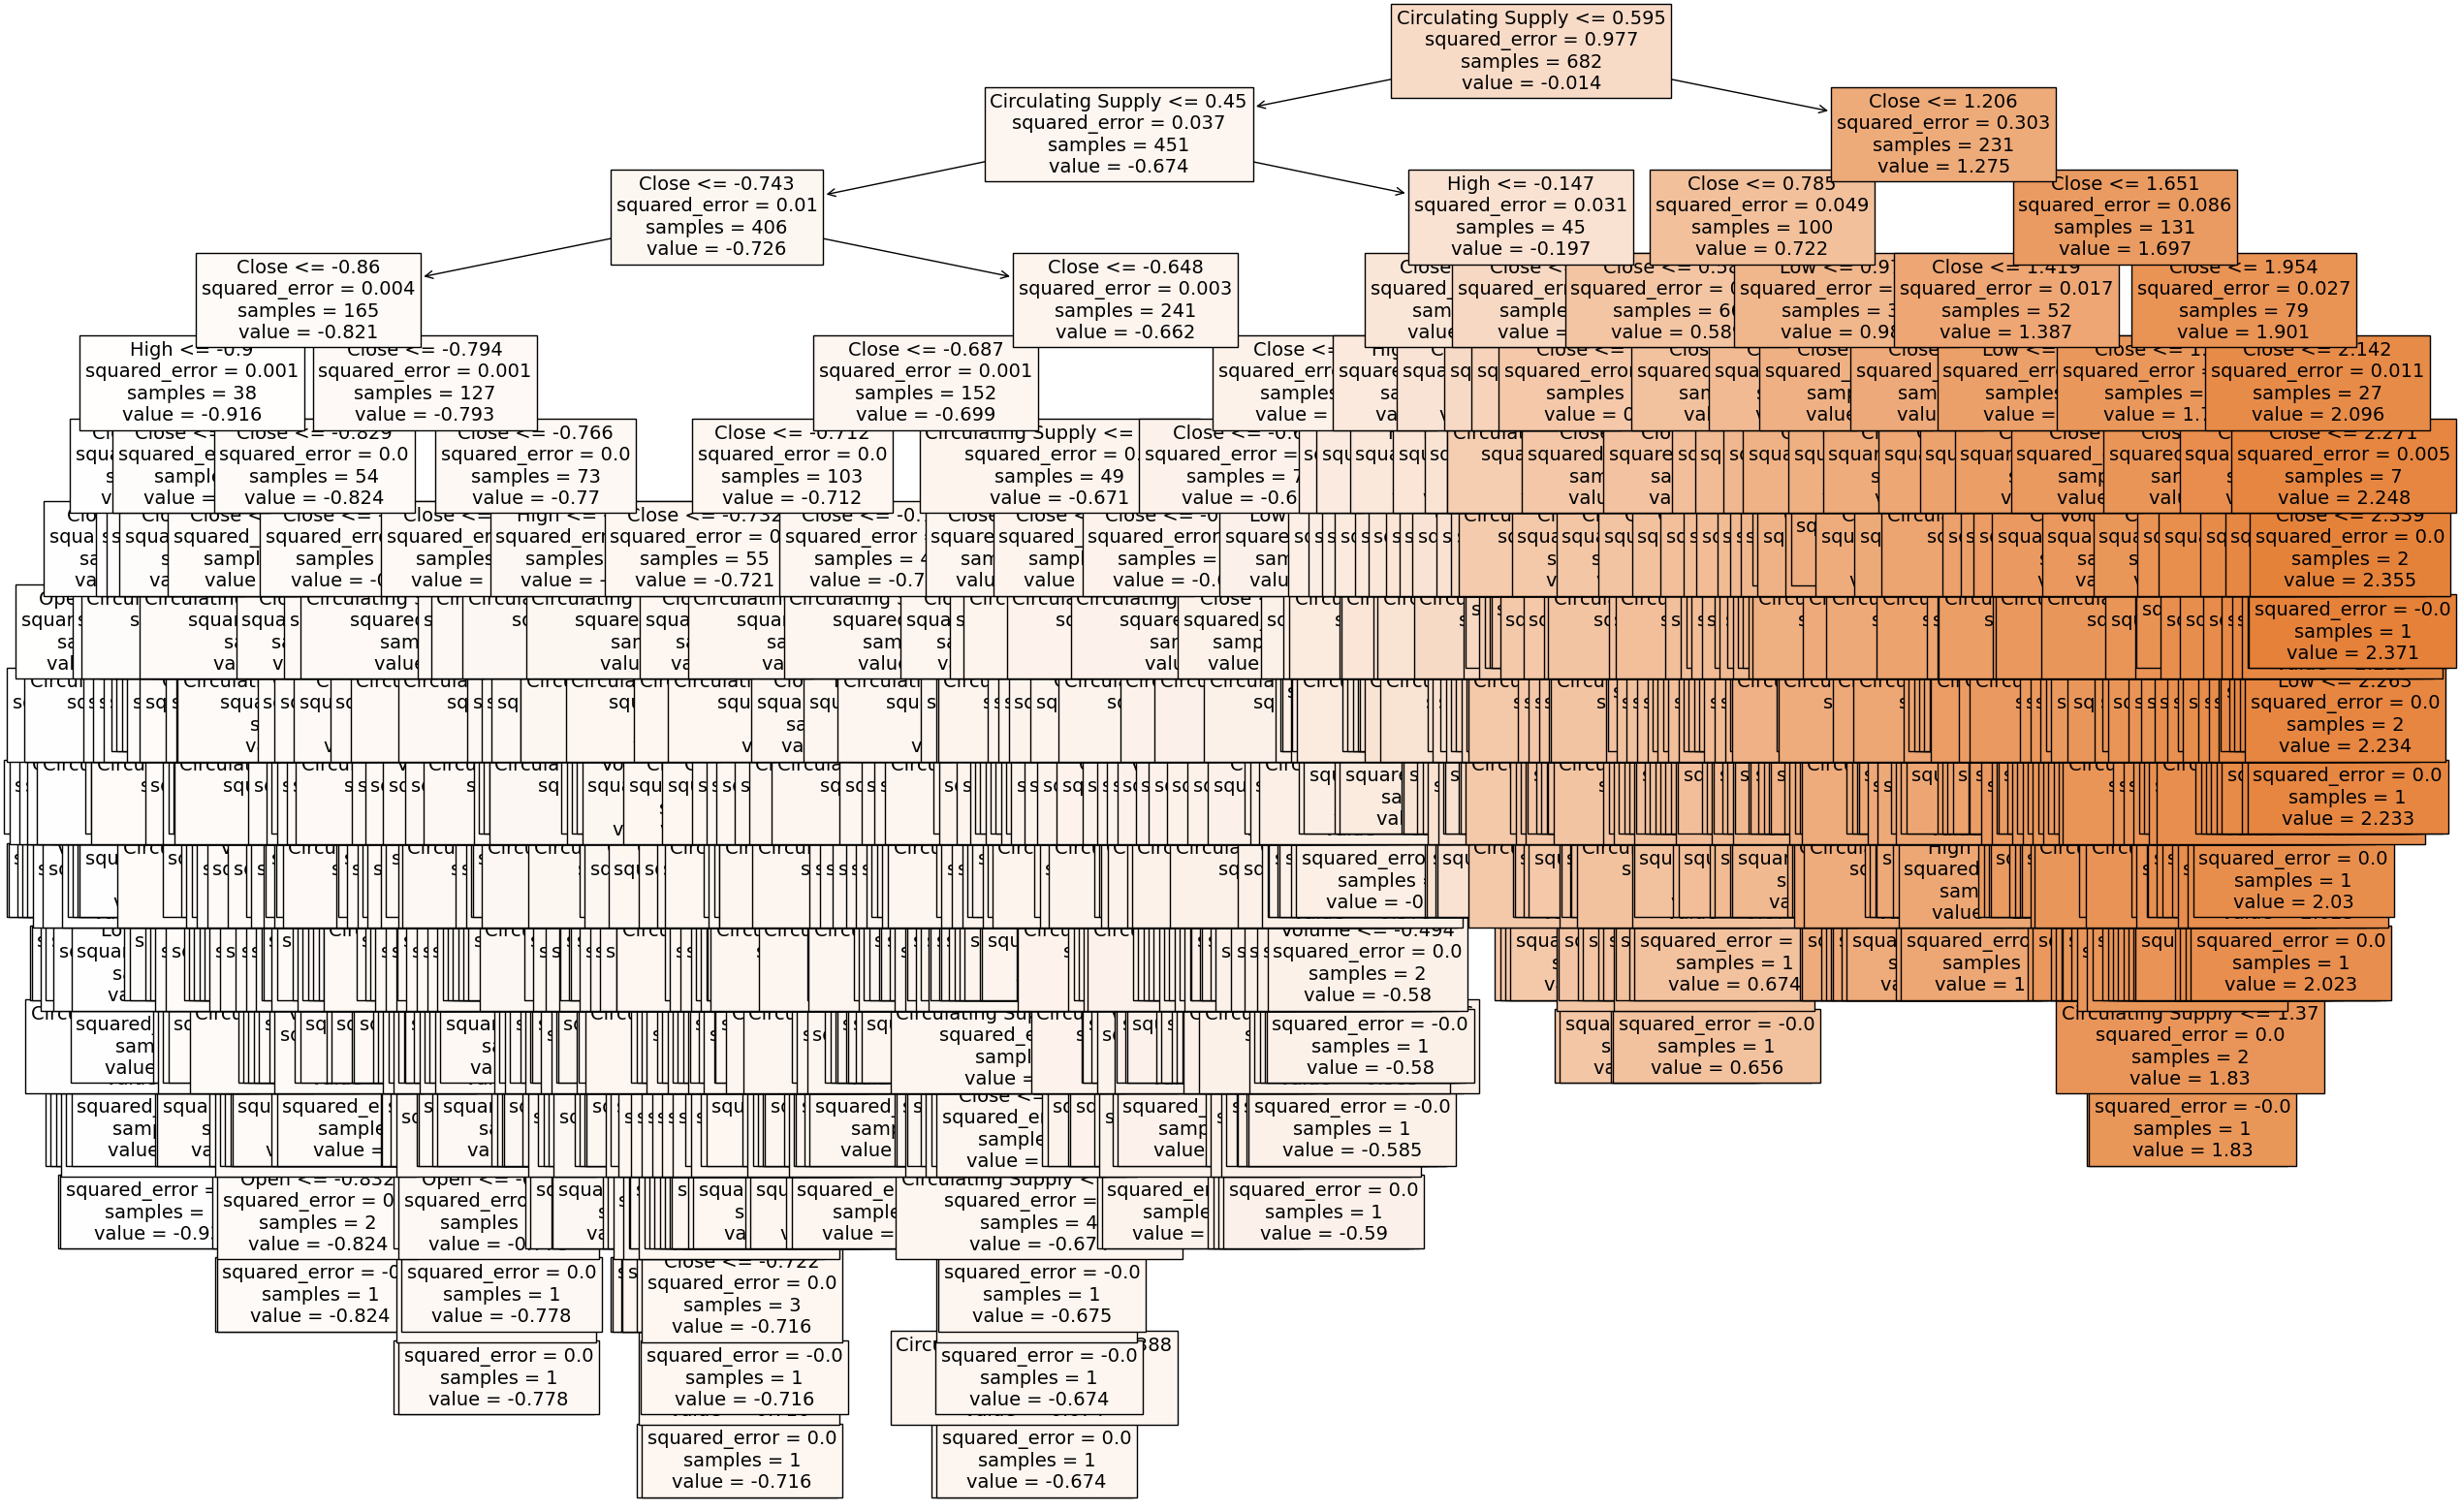

In [122]:
#BITCOIN
fig, ax = plt.subplots(figsize = (30, 20))
print(f'Profundidad del árbol: {modeloBit.get_depth()}')
print(f'Número de hojas: {modeloBit.get_n_leaves()}')
plot = plot_tree(decision_tree = modeloBit,
                feature_names = xEntBit.columns.to_list(),
                filled = True,
                fontsize = 14, ax = ax)
plt.show()

In [123]:
modeloEth = DecisionTreeRegressor()
modeloEth.fit(xEntEth, yEntEth)

DecisionTreeRegressor()

Profundidad del árbol: 14
Número de hojas: 574


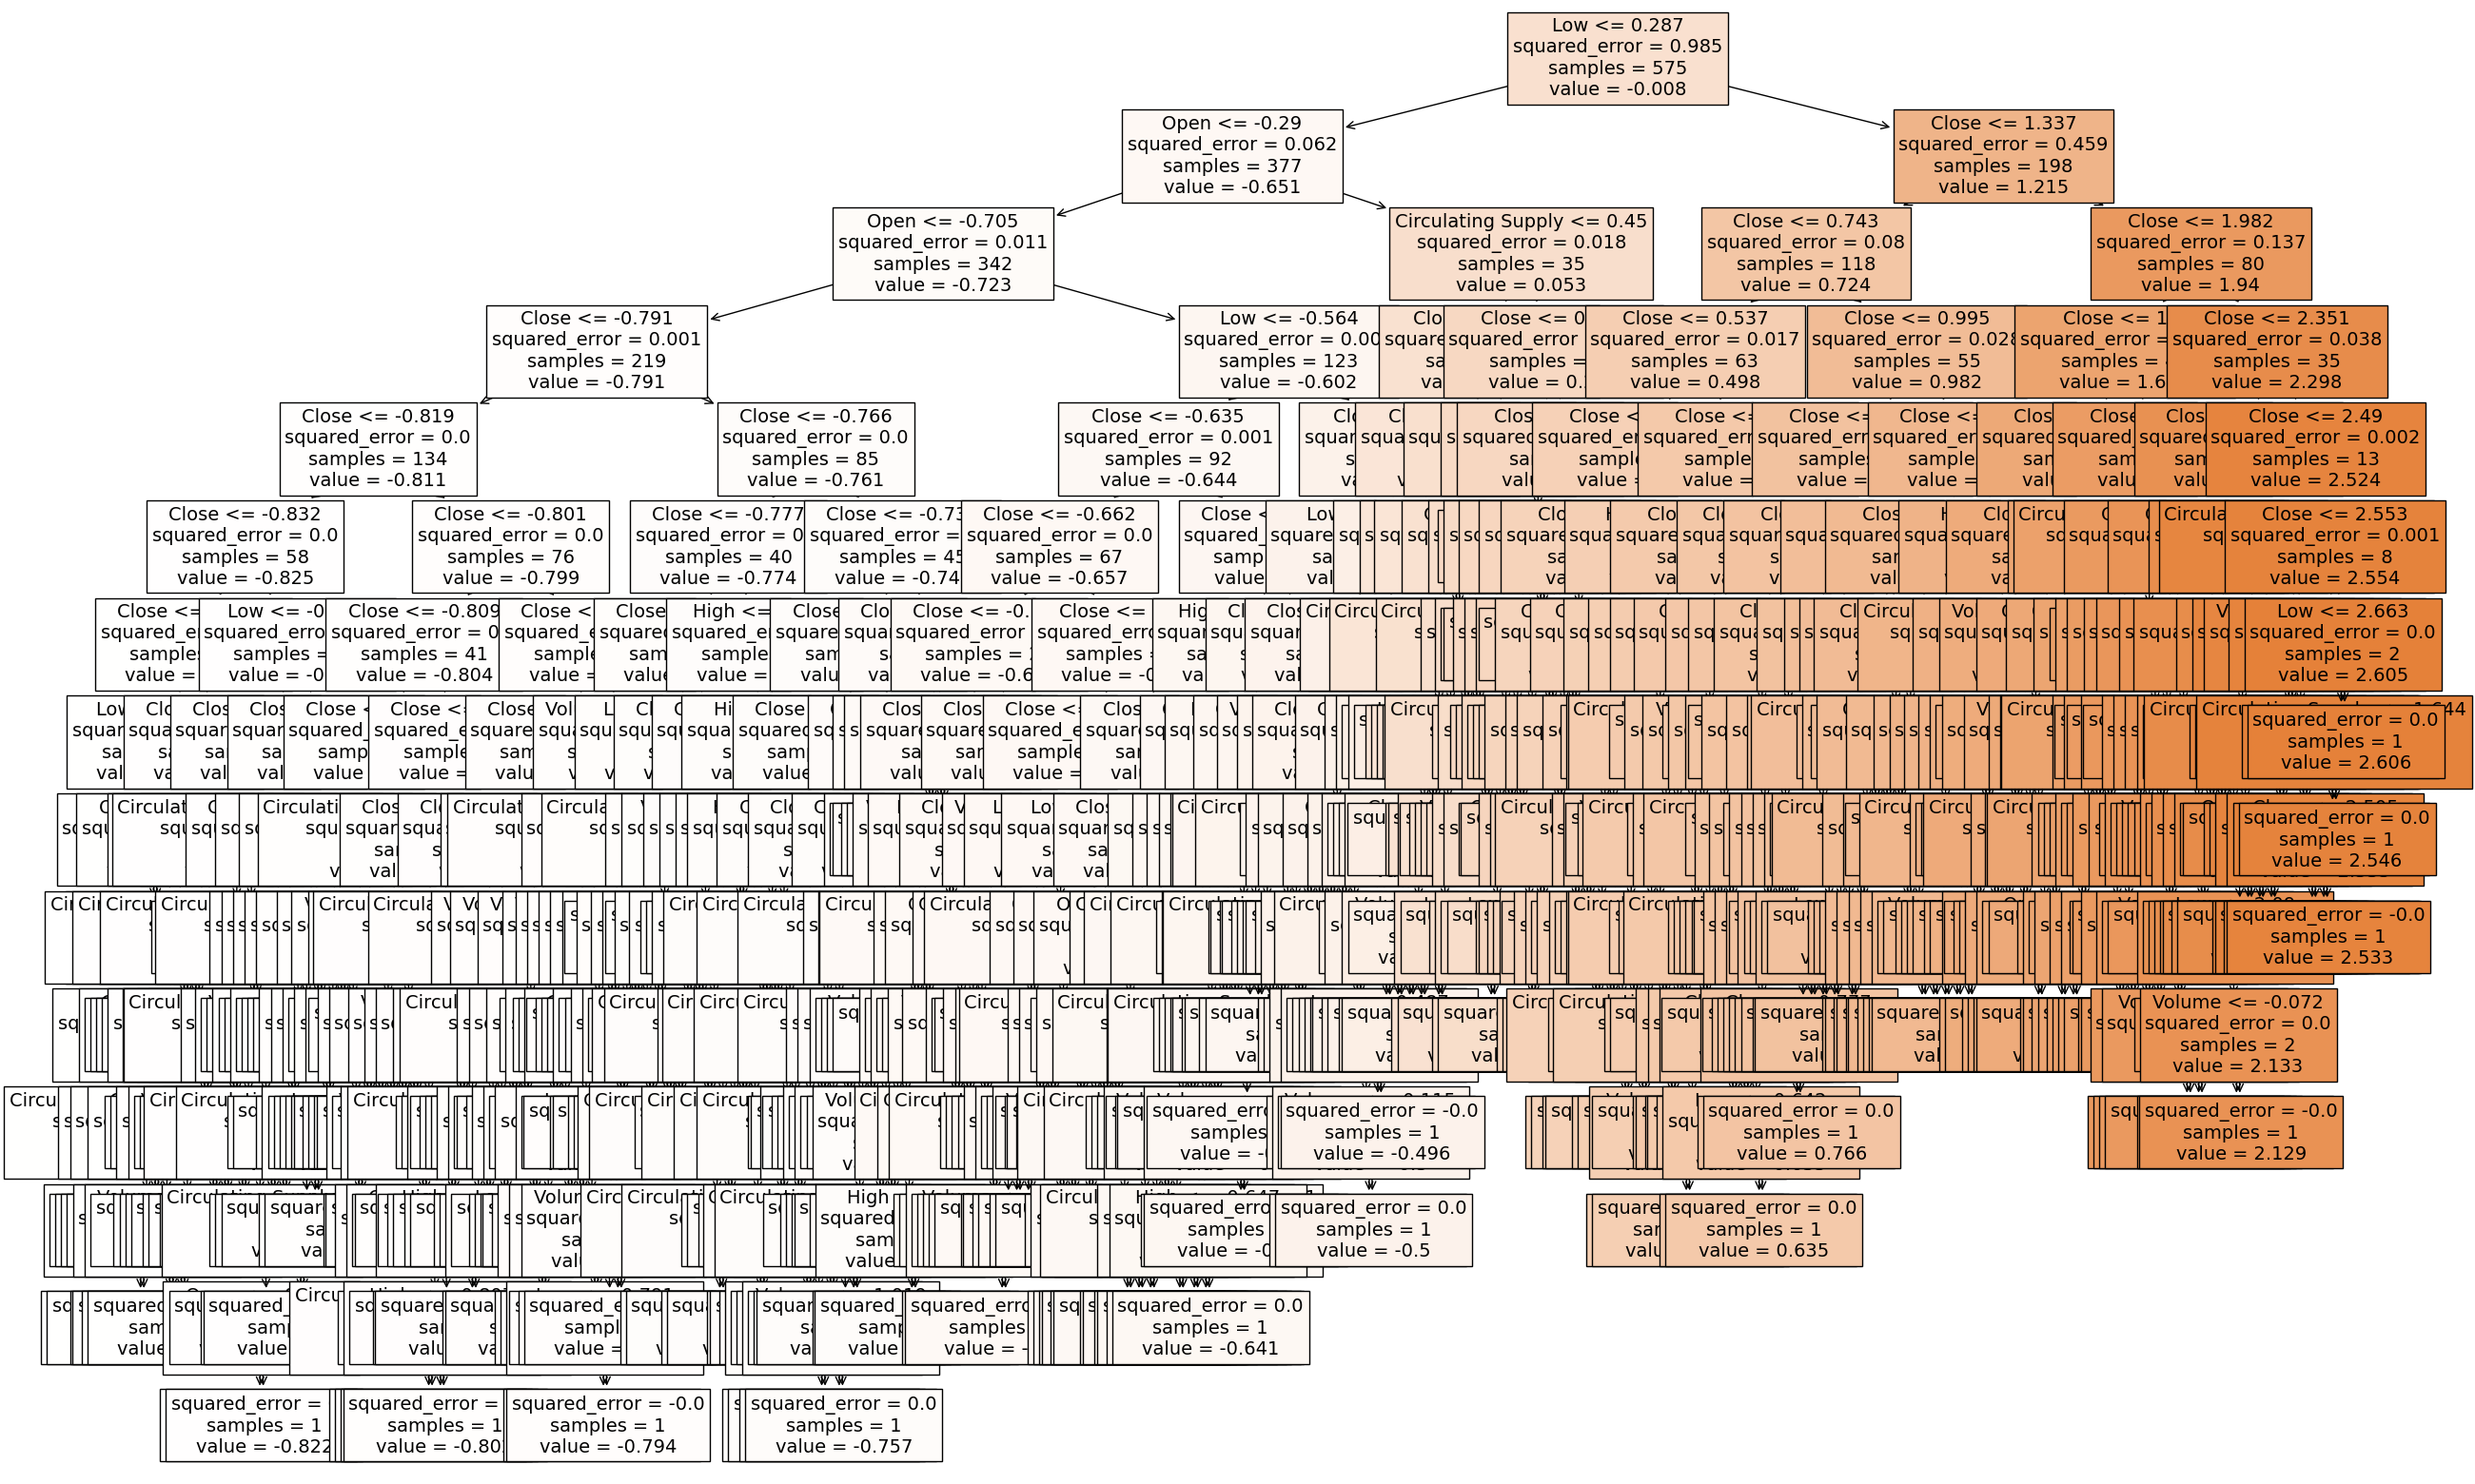

In [124]:
#ETHEREUM
fig, ax = plt.subplots(figsize = (30, 20))
print(f'Profundidad del árbol: {modeloEth.get_depth()}')
print(f'Número de hojas: {modeloEth.get_n_leaves()}')
plot = plot_tree(decision_tree = modeloEth,
                feature_names = xEntEth.columns.to_list(),
                filled = True,
                fontsize = 14, ax = ax)
plt.show()

In [125]:
modeloPan = DecisionTreeRegressor()
modeloPan.fit(xEntPan, yEntPan)

DecisionTreeRegressor()

Profundidad del árbol: 14
Número de hojas: 154


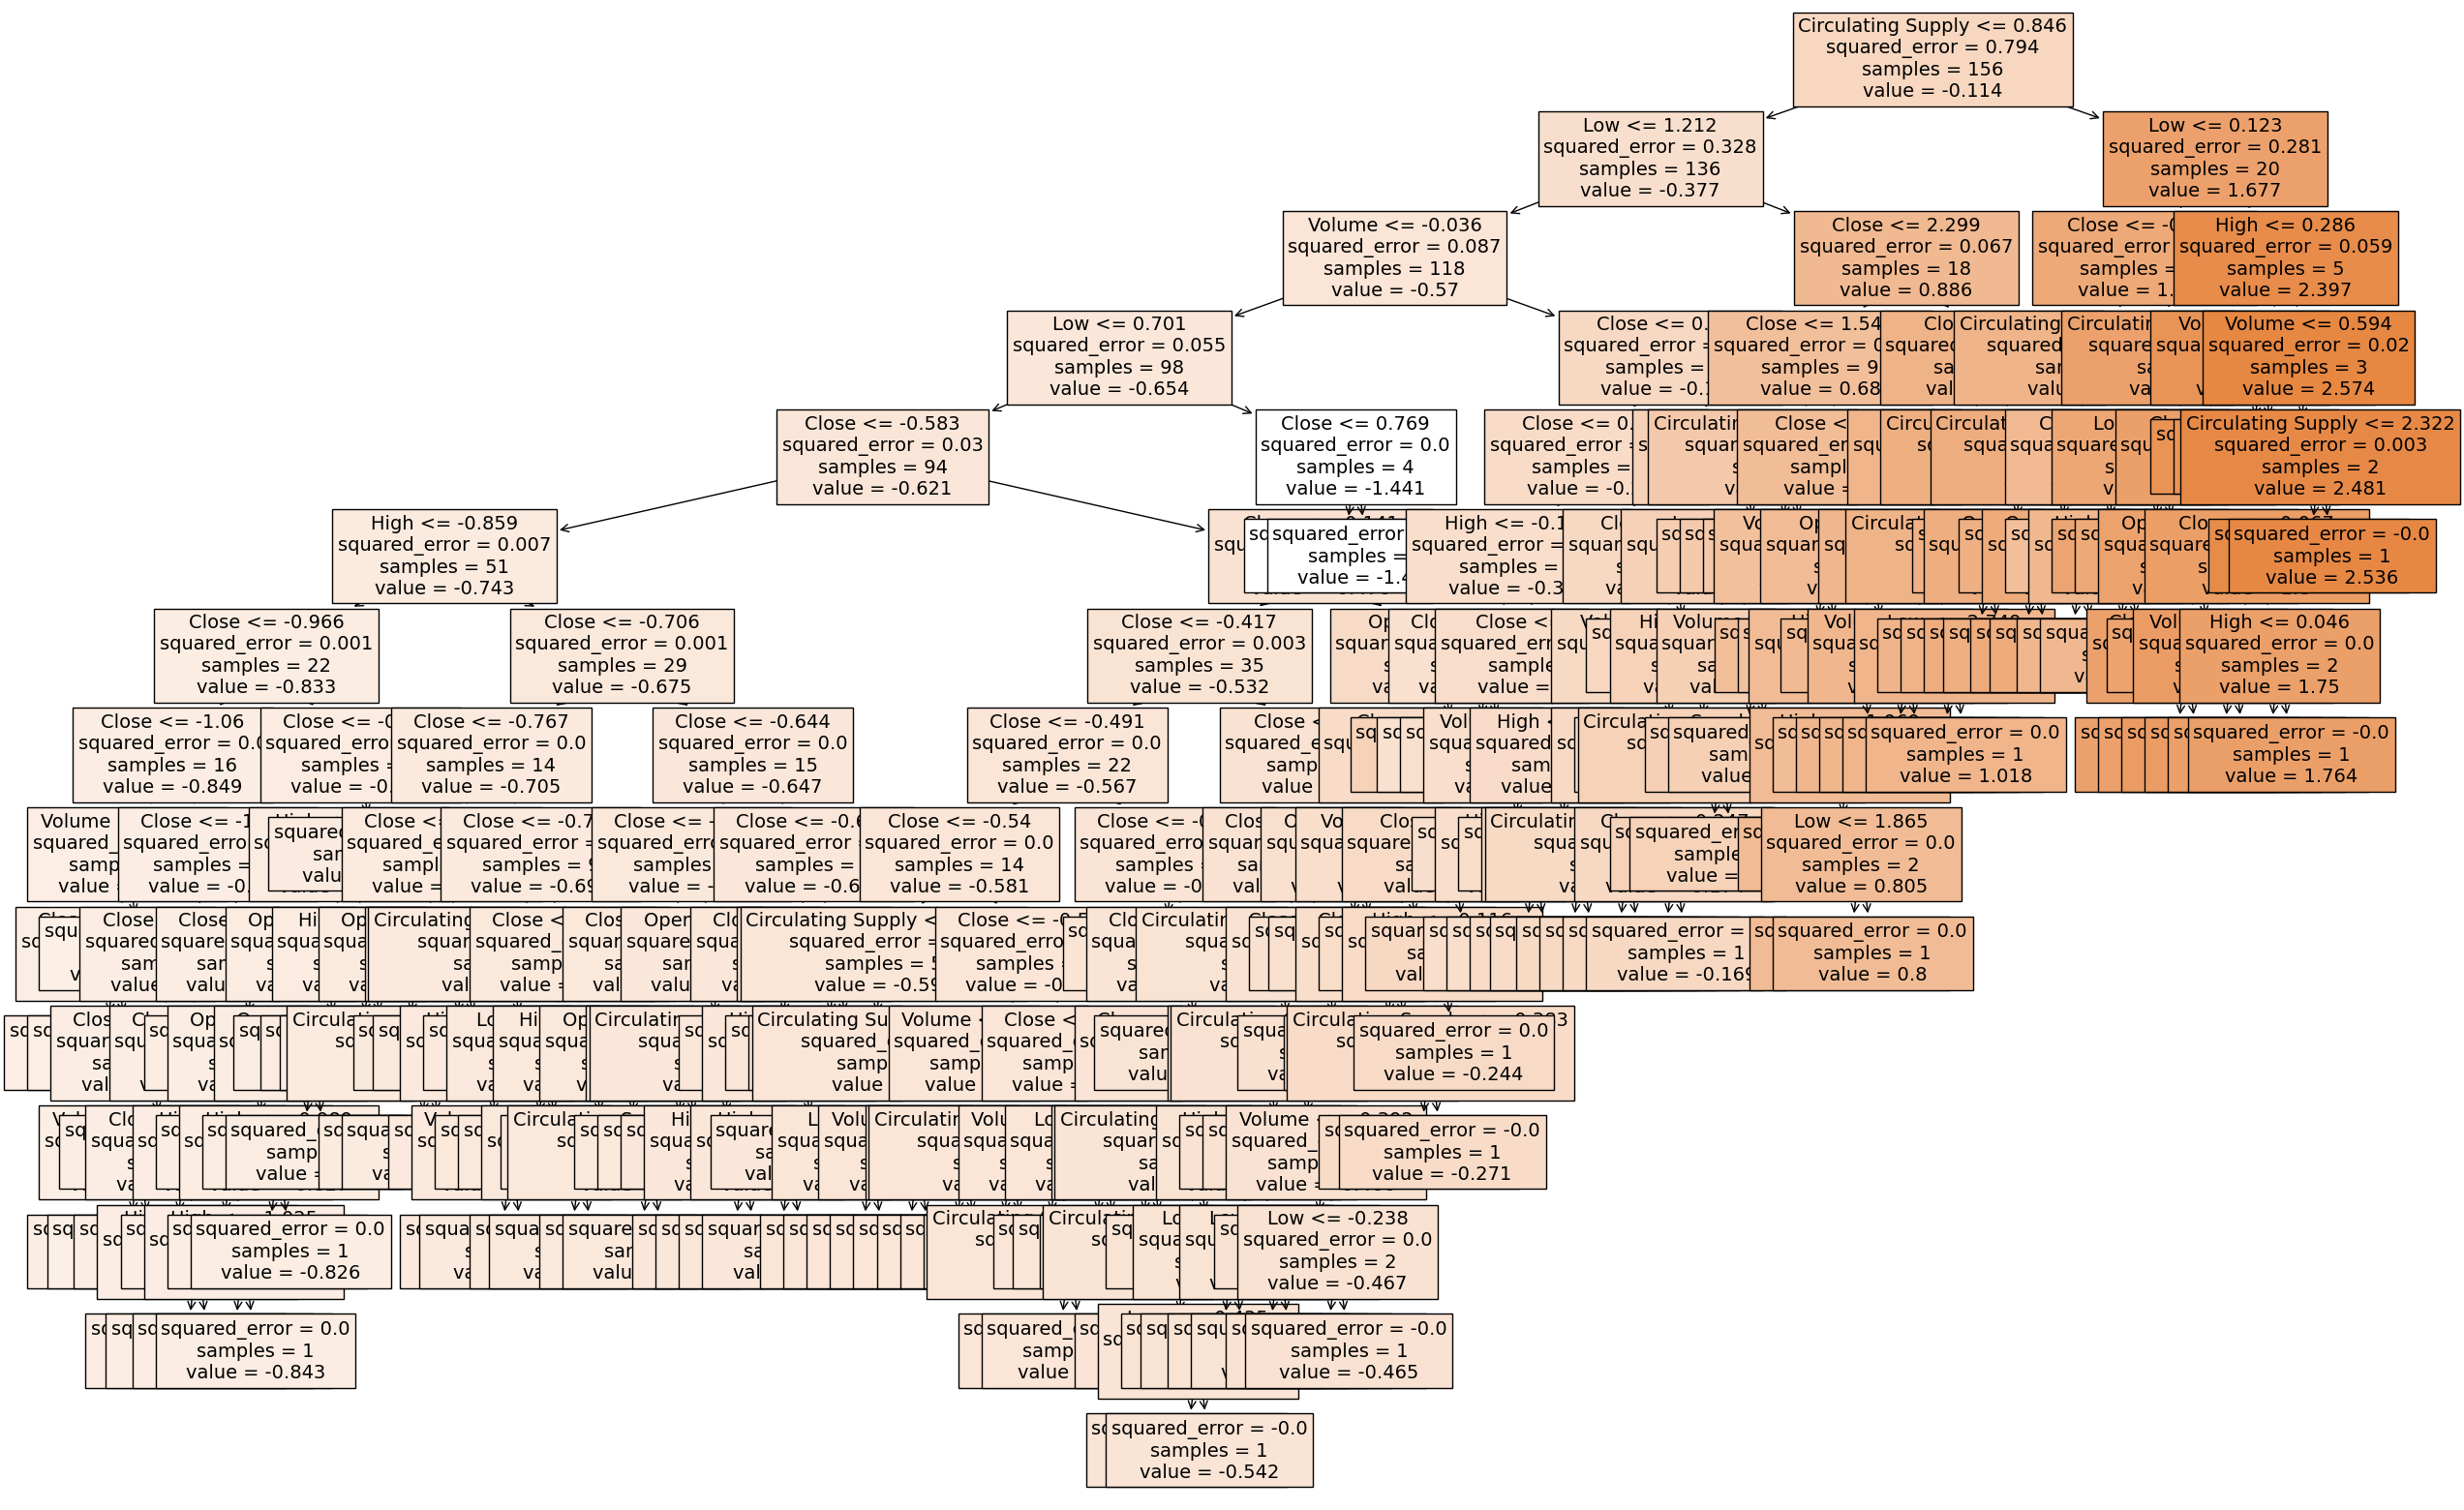

In [129]:
#PANGOLIN
fig, ax = plt.subplots(figsize = (30, 20))
print(f'Profundidad del árbol: {modeloPan.get_depth()}')
print(f'Número de hojas: {modeloPan.get_n_leaves()}')
plot = plot_tree(decision_tree = modeloPan,
                feature_names = xEntPan.columns.to_list(),
                filled = True,
                fontsize = 14, ax = ax)
plt.show()

In [133]:
#Métricas de desempeño BITCOIN
predEntBit = modeloBit.predict(xEntBit)
predPruebaBit = modeloBit.predict(xPruebaBit)

In [158]:
r2EntBit = r2_score(yEntBit, predEntBit)
rmseEntBit = mean_squared_error(yEntBit, predEntBit, squared = False)
maeEntBit = mean_absolute_error(yEntBit, predEntBit)
mapeEntBit = mean_absolute_percentage_error(yEntBit, predEntBit)
print(f'Las métricas de Entrenamiento de Bitcoin son: \nR2: {r2EntBit}' + f'\nRMSE: {rmseEntBit}\nMAE: {maeEntBit}\nMAPE: {mapeEntBit}')

Las métricas de Entrenamiento de Bitcoin son: 
R2: 1.0
RMSE: 0.0
MAE: 0.0
MAPE: 0.0


In [132]:
r2PruebaBit = r2_score(yPruebaBit, predPruebaBit)
rmsePruebaBit = mean_squared_error(yPruebaBit, predPruebaBit, squared = False)
maePruebaBit = mean_absolute_error(yPruebaBit, predPruebaBit)
mapePruebaBit = mean_absolute_percentage_error(yPruebaBit, predPruebaBit)
print(f'Las métricas de Prueba de Bitcoin son: \nR2: {r2PruebaBit}' + f'\nRMSE: {rmsePruebaBit}\nMAE: {maePruebaBit}\nMAPE: {mapePruebaBit}')

Las métricas de Prueba de Bitcoin son: 
R2: 0.9997016427840549
RMSE: 0.01770792990426743
MAE: 0.009059373076861816
MAPE: 0.017614465251150152


In [135]:
#Métricas de desempeño ETHEREUM
predEntEth = modeloEth.predict(xEntEth)
predPruebaEth = modeloEth.predict(xPruebaEth)

In [136]:
r2EntEth = r2_score(yEntEth, predEntEth)
rmseEntEth = mean_squared_error(yEntEth, predEntEth, squared = False)
maeEntEth = mean_absolute_error(yEntEth, predEntEth)
mapeEntEth = mean_absolute_percentage_error(yEntEth, predEntEth)
print(f'Las métricas de Entrenamiento de Ethereum son: \nR2: {r2EntEth}' + f'\nRMSE: {rmseEntEth}\nMAE: {maeEntEth}\nMAPE: {mapeEntEth}')

Las métricas de Entrenamiento de Ethereum son: 
R2: 1.0
RMSE: 7.013092677434351e-10
MAE: 4.1360964122260235e-11
MAPE: 4.9628283464450435e-11


In [137]:
r2PruebaEth = r2_score(yPruebaEth, predPruebaEth)
rmsePruebaEth = mean_squared_error(yPruebaEth, predPruebaEth, squared = False)
maePruebaEth = mean_absolute_error(yPruebaEth, predPruebaEth)
mapePruebaEth = mean_absolute_percentage_error(yPruebaEth, predPruebaEth)
print(f'Las métricas de Prueba de Ethereum son: \nR2: {r2PruebaEth}' + f'\nRMSE: {rmsePruebaEth}\nMAE: {maePruebaEth}\nMAPE: {mapePruebaEth}')

Las métricas de Prueba de Ethereum son: 
R2: 0.9995268143235196
RMSE: 0.022115747573803406
MAE: 0.011018481374453834
MAPE: 0.03739129725055473


In [138]:
#Métricas de desempeño PANGOLIN
predEntPan = modeloPan.predict(xEntPan)
predPruebaPan = modeloPan.predict(xPruebaPan)

In [140]:
r2EntPan = r2_score(yEntPan, predEntPan)
rmseEntPan = mean_squared_error(yEntPan, predEntPan, squared = False)
maeEntPan = mean_absolute_error(yEntPan, predEntPan)
mapeEntPan = mean_absolute_percentage_error(yEntPan, predEntPan)
print(f'Las métricas de Entrenamiento de Pangolin son: \nR2: {r2EntPan}' + f'\nRMSE: {rmseEntPan}\nMAE: {maeEntPan}\nMAPE: {mapeEntPan}')

Las métricas de Entrenamiento de Pangolin son: 
R2: 1.0
RMSE: 0.0
MAE: 0.0
MAPE: 0.0


In [141]:
r2PruebaPan = r2_score(yPruebaPan, predPruebaPan)
rmsePruebaPan = mean_squared_error(yPruebaPan, predPruebaPan, squared = False)
maePruebaPan = mean_absolute_error(yPruebaPan, predPruebaPan)
mapePruebaPan = mean_absolute_percentage_error(yPruebaPan, predPruebaPan)
print(f'Las métricas de Prueba de Pangolin son: \nR2: {r2PruebaPan}' + f'\nRMSE: {rmsePruebaPan}\nMAE: {maePruebaPan}\nMAPE: {mapePruebaPan}')

Las métricas de Prueba de Pangolin son: 
R2: 0.9818491009888234
RMSE: 0.15799648489157608
MAE: 0.08268498023663973
MAPE: 0.11134844585177482


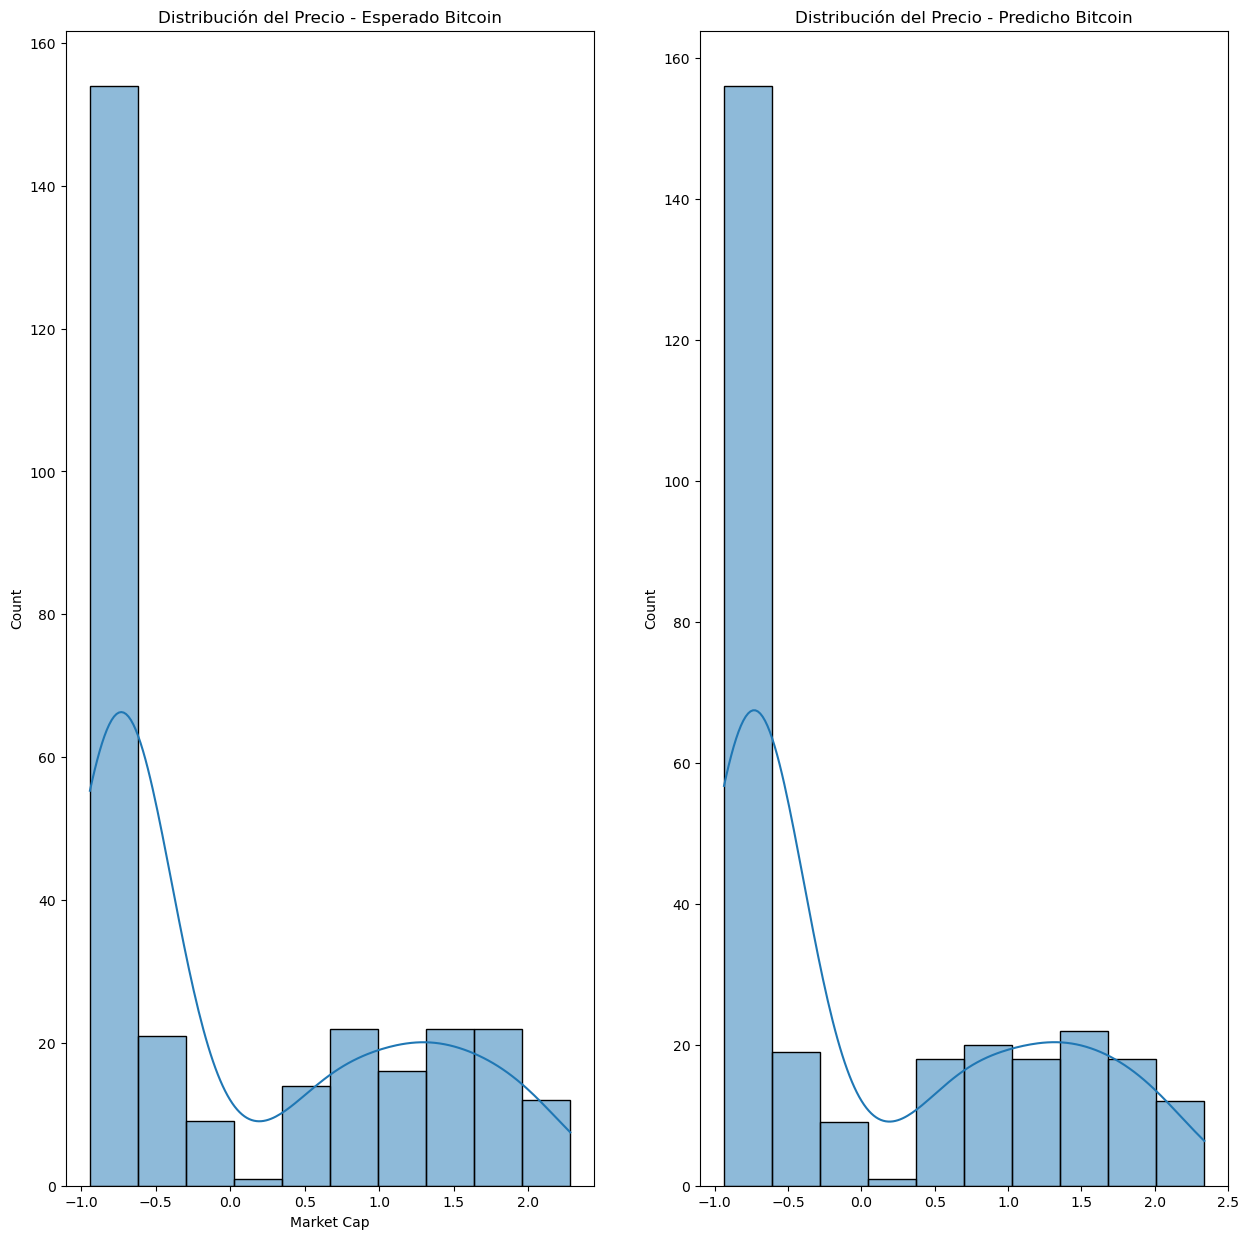

In [146]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
sb.histplot(yPruebaBit, kde = True, ax = ax[0])
ax[0].set_title('Market Cap - Esperado Bitcoin')
ax[0].set_label('Precio')

sb.histplot(predPruebaBit, kde = True, ax = ax[1])
ax[1].set_title('Market Cap - Predicho Bitcoin')
ax[1].set_label('Precio')
plt.show()

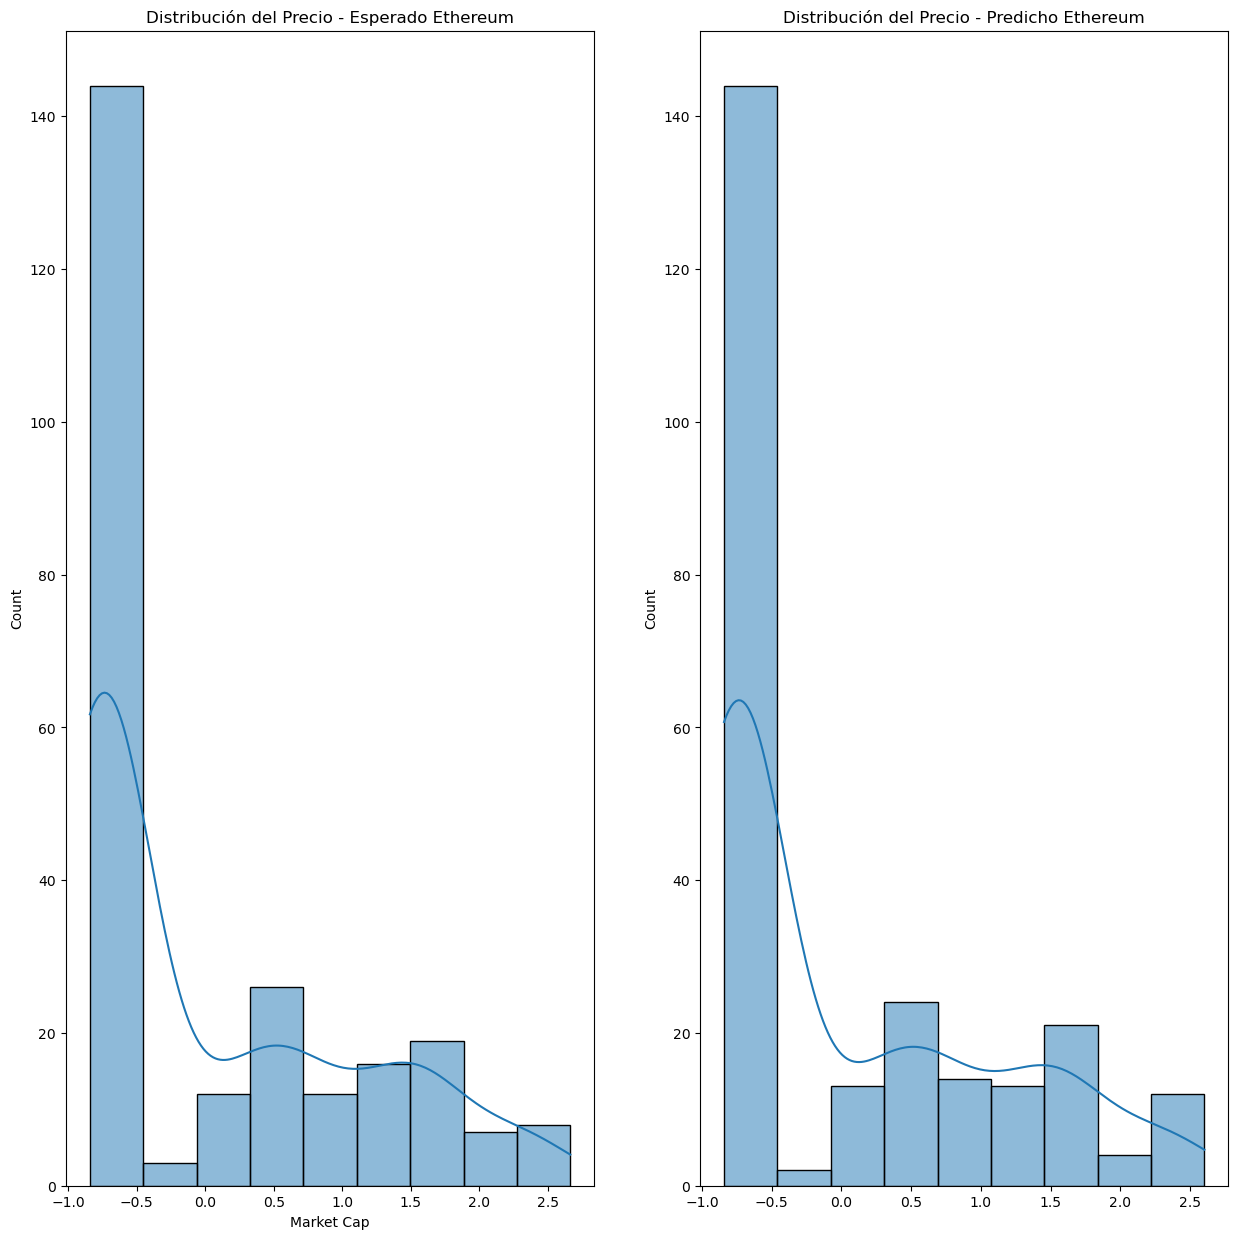

In [147]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
sb.histplot(yPruebaEth, kde = True, ax = ax[0])
ax[0].set_title('Market Cap - Esperado Ethereum')
ax[0].set_label('Precio')

sb.histplot(predPruebaEth, kde = True, ax = ax[1])
ax[1].set_title('Market Cap - Predicho Ethereum')
ax[1].set_label('Precio')
plt.show()

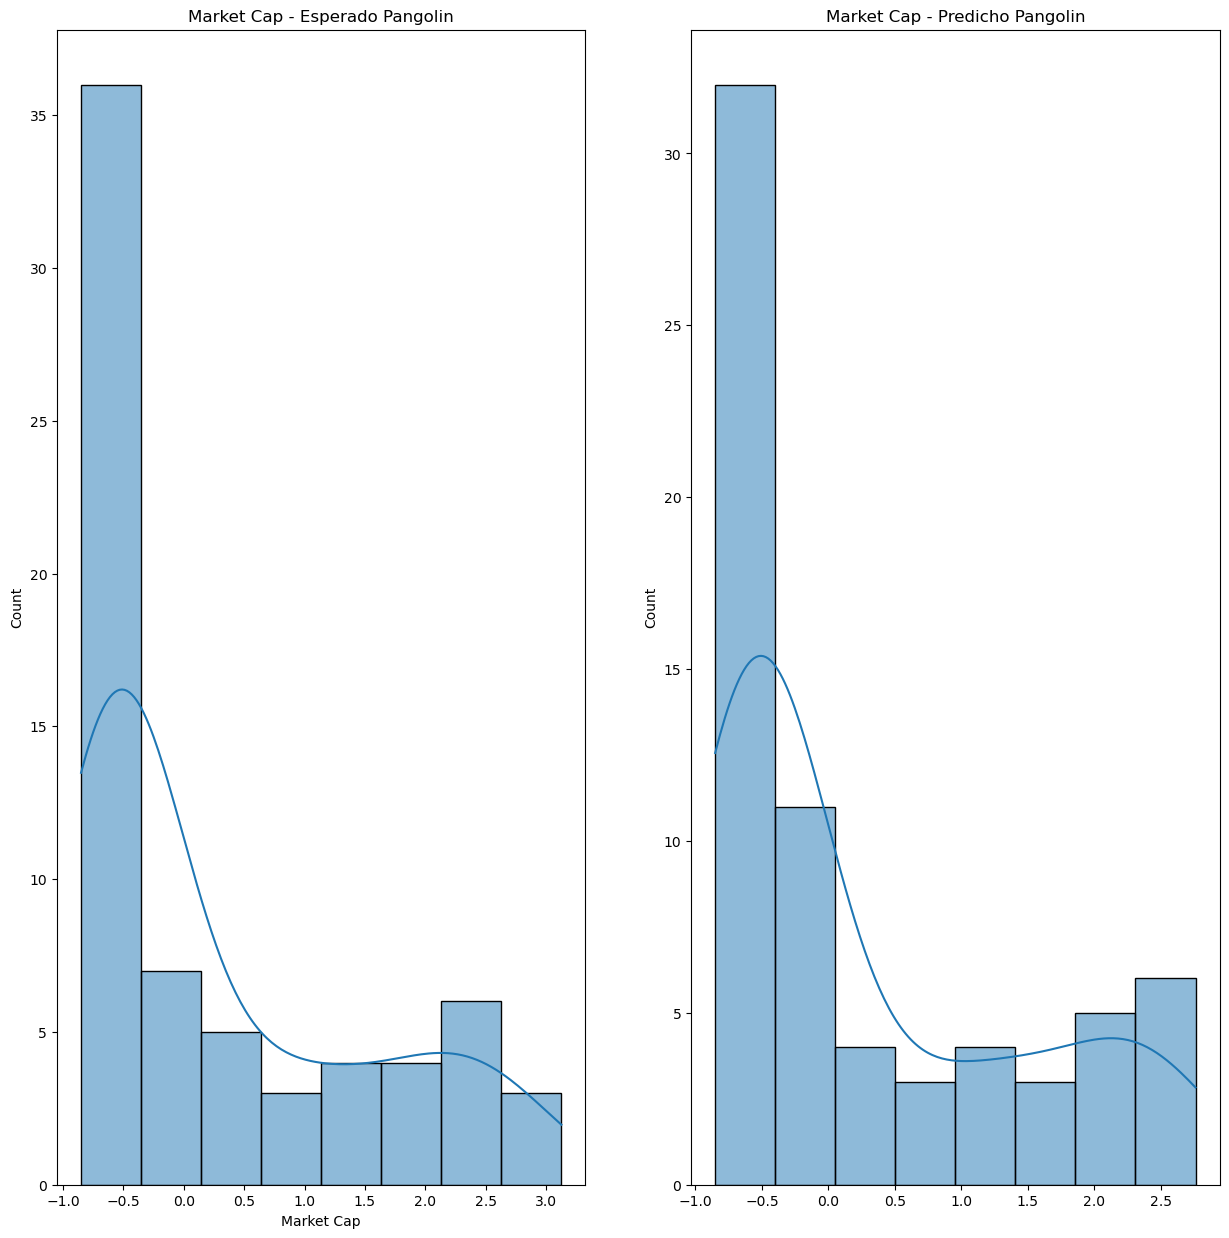

In [149]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
sb.histplot(yPruebaPan, kde = True, ax = ax[0])
ax[0].set_title('Market Cap - Esperado Pangolin')
ax[0].set_label('Precio')

sb.histplot(predPruebaPan, kde = True, ax = ax[1])
ax[1].set_title('Market Cap - Predicho Pangolin')
ax[1].set_label('Precio')
plt.show()

In [150]:
#Búsqueda de hiperparámetros BITCOIN
gridParamsBit = {'max_depth': [3, 5, 8, 10, 15, 20],
             'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
             'min_samples_split': [4, 3, 2, 1]}

regresorBit = GridSearchCV(modeloBit, param_grid = gridParamsBit, cv = 5)
regresorBit.fit(xEntBit, yEntBit)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson', 'friedman_mse'],
                         'max_depth': [3, 5, 8, 10, 15, 20],
                         'min_samples_split': [4, 3, 2, 1]})

In [151]:
validacionBit = pd.concat([pd.DataFrame(regresorBit.cv_results_['params']),
                       pd.DataFrame(regresorBit.cv_results_['mean_test_score'], 
                                   columns = ['R2'])], axis = 1)
validacionBit.sort_values('R2', ascending = False)

criterion  max_depth  min_samples_split        R2
34  absolute_error          8                  2  0.999687
37  absolute_error         10                  3  0.999685
41  absolute_error         15                  3  0.999653
45  absolute_error         20                  3  0.999650
9    squared_error          8                  3  0.999648
..             ...        ...                ...       ...
79    friedman_mse          5                  1       NaN
83    friedman_mse          8                  1       NaN
87    friedman_mse         10                  1       NaN
91    friedman_mse         15                  1       NaN
95    friedman_mse         20                  1       NaN

[96 rows x 4 columns]

In [152]:
regresorAleatorizadaBit = RandomizedSearchCV(modeloBit, cv = 5, 
                                         param_distributions = gridParamsBit,
                                         n_iter = 15)
regresorAleatorizadaBit.fit(xEntBit, yEntBit)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=15,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [3, 5, 8, 10, 15, 20],
                                        'min_samples_split': [4, 3, 2, 1]})

In [153]:
regresorAleatorizadaBit = pd.concat([pd.DataFrame(regresorAleatorizadaBit.cv_results_['params']),
                       pd.DataFrame(regresorAleatorizadaBit.cv_results_['mean_test_score'], 
                                   columns = ['R2'])], axis = 1)

regresorAleatorizadaBit.sort_values('R2', ascending = False)

min_samples_split  max_depth       criterion        R2
0                   3         15    friedman_mse  0.999617
9                   3         15  absolute_error  0.999574
11                  2         10  absolute_error  0.999573
12                  4          8    friedman_mse  0.999524
13                  4         10  absolute_error  0.999487
10                  3          5    friedman_mse  0.998719
1                   3         10         poisson       NaN
2                   3          3         poisson       NaN
3                   1         15    friedman_mse       NaN
4                   1          5         poisson       NaN
5                   4         20         poisson       NaN
6                   4         10         poisson       NaN
7                   1         10    friedman_mse       NaN
8                   1         20    friedman_mse       NaN
14                  4          8         poisson       NaN

In [154]:
#Búsqueda de hiperparámetros ETHEREUM
gridParamsEth = {'max_depth': [3, 5, 8, 10, 15, 20],
             'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
             'min_samples_split': [4, 3, 2, 1]}

regresorEth = GridSearchCV(modeloEth, param_grid = gridParamsEth, cv = 5)
regresorEth.fit(xEntEth, yEntEth)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson', 'friedman_mse'],
                         'max_depth': [3, 5, 8, 10, 15, 20],
                         'min_samples_split': [4, 3, 2, 1]})

In [155]:
validacionEth = pd.concat([pd.DataFrame(regresorEth.cv_results_['params']),
                       pd.DataFrame(regresorEth.cv_results_['mean_test_score'], 
                                   columns = ['R2'])], axis = 1)
validacionEth.sort_values('R2', ascending = False)

criterion  max_depth  min_samples_split        R2
81   friedman_mse          8                  3  0.999680
9   squared_error          8                  3  0.999651
20  squared_error         20                  4  0.999633
21  squared_error         20                  3  0.999630
94   friedman_mse         20                  2  0.999627
..            ...        ...                ...       ...
79   friedman_mse          5                  1       NaN
83   friedman_mse          8                  1       NaN
87   friedman_mse         10                  1       NaN
91   friedman_mse         15                  1       NaN
95   friedman_mse         20                  1       NaN

[96 rows x 4 columns]

In [156]:
regresorAleatorizadaEth = RandomizedSearchCV(modeloEth, cv = 5, 
                                         param_distributions = gridParamsEth,
                                         n_iter = 15)
regresorAleatorizadaEth.fit(xEntEth, yEntEth)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=15,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [3, 5, 8, 10, 15, 20],
                                        'min_samples_split': [4, 3, 2, 1]})

In [157]:
regresorAleatorizadaEth = pd.concat([pd.DataFrame(regresorAleatorizadaEth.cv_results_['params']),
                       pd.DataFrame(regresorAleatorizadaEth.cv_results_['mean_test_score'], 
                                   columns = ['R2'])], axis = 1)

regresorAleatorizadaEth.sort_values('R2', ascending = False)

min_samples_split  max_depth       criterion        R2
14                  2         10   squared_error  0.999658
9                   4         10   squared_error  0.999581
4                   3          8   squared_error  0.999573
13                  4         15    friedman_mse  0.999564
5                   2         15  absolute_error  0.999306
10                  2         10  absolute_error  0.999232
11                  4          8  absolute_error  0.999121
3                   4          5   squared_error  0.998999
12                  3          3   squared_error  0.987102
2                   4          3   squared_error  0.987065
0                   4          3         poisson       NaN
1                   1         15   squared_error       NaN
6                   1         20    friedman_mse       NaN
7                   1          3    friedman_mse       NaN
8                   1          8   squared_error       NaN

In [160]:
#Búsqueda de hiperparámetros PANGOLIN
gridParamsPan = {'max_depth': [3, 5, 8, 10, 15, 20],
             'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
             'min_samples_split': [4, 3, 2, 1]}

regresorPan = GridSearchCV(modeloPan, param_grid = gridParamsPan, cv = 5)
regresorPan.fit(xEntPan, yEntPan)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson', 'friedman_mse'],
                         'max_depth': [3, 5, 8, 10, 15, 20],
                         'min_samples_split': [4, 3, 2, 1]})

In [161]:
validacionPan = pd.concat([pd.DataFrame(regresorPan.cv_results_['params']),
                       pd.DataFrame(regresorPan.cv_results_['mean_test_score'], 
                                   columns = ['R2'])], axis = 1)
validacionPan.sort_values('R2', ascending = False)

criterion  max_depth  min_samples_split        R2
45  absolute_error         20                  3  0.932743
44  absolute_error         20                  4  0.931990
36  absolute_error         10                  4  0.931814
41  absolute_error         15                  3  0.931715
10   squared_error          8                  2  0.931200
..             ...        ...                ...       ...
79    friedman_mse          5                  1       NaN
83    friedman_mse          8                  1       NaN
87    friedman_mse         10                  1       NaN
91    friedman_mse         15                  1       NaN
95    friedman_mse         20                  1       NaN

[96 rows x 4 columns]

In [162]:
regresorAleatorizadaPan = RandomizedSearchCV(modeloPan, cv = 5, 
                                         param_distributions = gridParamsPan,
                                         n_iter = 15)
regresorAleatorizadaPan.fit(xEntPan, yEntPan)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=15,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [3, 5, 8, 10, 15, 20],
                                        'min_samples_split': [4, 3, 2, 1]})

In [163]:
regresorAleatorizadaPan = pd.concat([pd.DataFrame(regresorAleatorizadaPan.cv_results_['params']),
                       pd.DataFrame(regresorAleatorizadaPan.cv_results_['mean_test_score'], 
                                   columns = ['R2'])], axis = 1)

regresorAleatorizadaPan.sort_values('R2', ascending = False)

min_samples_split  max_depth       criterion        R2
8                   4         20    friedman_mse  0.928376
11                  2          8    friedman_mse  0.927367
7                   3         20  absolute_error  0.927054
1                   2         20    friedman_mse  0.926823
4                   2         10  absolute_error  0.926813
14                  3          5  absolute_error  0.923184
12                  3          5    friedman_mse  0.914525
5                   2          5    friedman_mse  0.914486
6                   4         10   squared_error  0.912818
0                   1          5    friedman_mse       NaN
2                   1         15         poisson       NaN
3                   1         20    friedman_mse       NaN
9                   1          5  absolute_error       NaN
10                  1         20   squared_error       NaN
13                  2          8         poisson       NaN

In [ ]:
#Los mejores árboles de Bitcoin son:
# - Búsqueda exhaustiva: número 34, con un R2 = 0.999687
# - Búsqueda aleatorizada: número 0, con un R2 = 0.999617

#Los mejores árboles de Ethereum son:
# - Búsqueda exhaustiva: número 81, con un R2 = 0.999680
# - Búsqueda aleatorizada: número 14, con un R2 = 0.999658

#Los mejores árboles de Pangolin son:
# - Búsqueda exhaustiva: número 45, con un R2 = 0.932743
# - Búsqueda aleatorizada: número 8, con un R2 = 0.928376

#En teoría sí se podría invertir según los modelos, ya que tienen un ajuste bastante bueno.
#Sin embargo, por la práctica sabemos que es muy difícil predecir el futuro de este tipo de activos.